In [1]:
__author__ = "@Tssp"
__date__ = "18/10/21"
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from GPE_Split_Step_Fourier import GPE_Solver_2D
import os
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
ref_ticksize = 16
plt.rcParams['xtick.labelsize']=ref_ticksize
plt.rcParams['legend.fontsize']=ref_ticksize
plt.rcParams['ytick.labelsize']=ref_ticksize
plt.rcParams['axes.labelsize']=ref_ticksize * 3/2
plt.rcParams['axes.titlesize']=ref_ticksize * 3/2

The adimensional Gross-Pitaevskii Equation reads

$$i\frac{\partial \Psi(x, t)}{\partial t} = -\frac{1}{2} \frac{\partial^2 \Psi(x, t)}{\partial x^2} + |\Psi(x,t)|^2 \Psi(x,t) + V(x,t) \Psi(x,t)$$

where $x = \frac{x'}{\xi},\ \Psi = \frac{\Psi'}{\psi_0},\ t = \frac{t'}{\tau}$, with $\xi=\frac{\hbar}{\sqrt{m\mu}},\ \psi_0 = \sqrt{\frac{\mu}{g}},\ \tau = \frac{\hbar}{\mu}$

In [2]:
Lx          = 64   # Domain size
Ly          = 64
Nx          = 256  # Number of grid points
Ny          = 256
dX          = Lx/Nx  # Cell size
dY          = Ly/Ny
x           = np.arange(-Lx/2, Lx/2, dX, dtype=complex)
y           = np.arange(-Ly/2, Ly/2, dY, dtype=complex)
X, Y        = np.meshgrid(x, y)
dT          = 0.01 # Time step size
kx          = 2*pi*np.fft.fftfreq(Nx, d=dX)
ky          = 2*pi*np.fft.fftfreq(Ny, d=dY)
Kx, Ky      = np.meshgrid(kx, ky)
g           = 1
figure_path = 'Figures/Gaussian2D'
data_path   = 'Data/Soliton2D'
os.makedirs(figure_path, exist_ok=True)
os.makedirs(data_path, exist_ok=True)

In [3]:
def V(X, Y):
    return 0.5*(X**2 + Y**2)

V = V(X, Y)

In [4]:
def gaussian_2D(X, Y, X0, Y0):
    """
    a gaussian wave packet of width a, centered at x0, with momentum k0
    """ 
    return ((np.sqrt(np.pi)) ** (-0.5)
            * np.exp(-0.5 * ((X - X0)) ** 2 + 1j * X)) * np.exp(-0.5 * ((Y - Y0)) ** 2 + 1j * Y)

psi0 = gaussian_2D(X, Y, 0, 0)

In [5]:
GPE = GPE_Solver_2D(X, Y, V, psi0, Kx, Ky)

256 256

        GPE Solver initialized for a GRID from x=-32.0 to x=31.75 and 
        y=-32.0 to y=-32.0
        hbar=1 
        m=1
        


/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-5.0, 5.0)

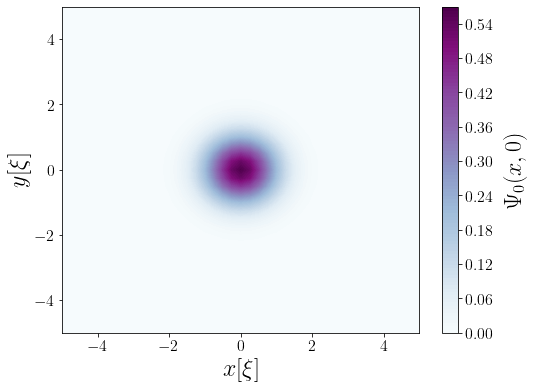

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
c = ax.contourf(X, Y, np.abs(psi0)**2, levels=100, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$\Psi_0(x,0)$', labelpad=10)
ax.set_xlabel(r'$x[\xi]$')
ax.set_ylabel(r'$y[\xi]$')
ax.set_ylim(-5, 5)
ax.set_xlim(-5, 5)

In [9]:
GPE.run_and_plot(1000, dT, g, figure_path+'/GPE_GaussianHO.png')

(-3.0, 3.0)

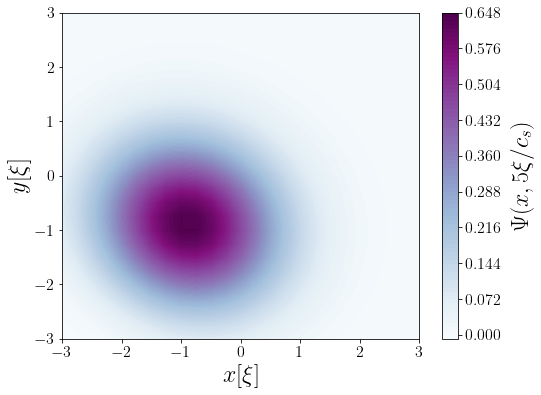

In [26]:
fig, ax = plt.subplots(figsize=(8,6))
c = ax.contourf(X, Y, np.real(GPE.psi_x[500,:,:]), levels=100, cmap='BuPu')
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$\Psi(x, 5\xi/c_s)$', labelpad=10)
ax.set_xlabel(r'$x[\xi]$')
ax.set_ylabel(r'$y[\xi]$')
ax.set_ylim(-3, 3)
ax.set_xlim(-3, 3)

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(-3.0, 3.0)

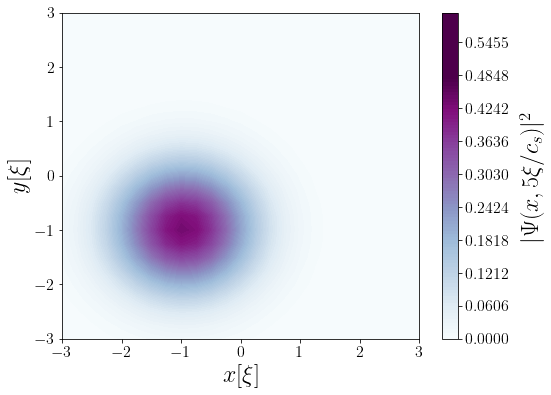

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
c = ax.contourf(X, Y, GPE.prob_densities[500,:,:], levels=np.linspace(0, 0.6, num=100), cmap='BuPu', vmin=0, vmax=0.48)
cbar = plt.colorbar(c)
ax.set_xlabel(r'$x[\xi]$')
ax.set_ylabel(r'$y[\xi]$')
cbar.ax.set_ylabel(r'$|\Psi(x, 5\xi/c_s)|^2$', labelpad=10)
ax.set_ylim(-3, 3)
ax.set_xlim(-3, 3)

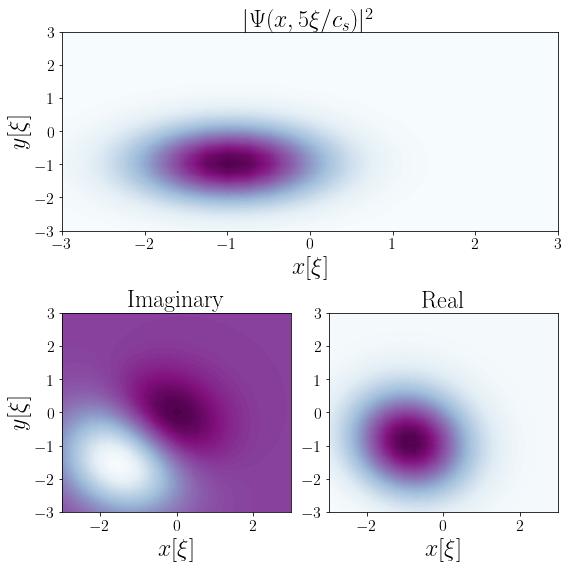

In [145]:
fig = plt.figure(figsize=(8,8))

ax1 = plt.subplot(211)
cd = ax1.contourf(X, Y, GPE.prob_densities[500,:,:], levels=100, cmap='BuPu')
ax1.set_ylim(-3, 3)
ax1.set_xlim(-3, 3)
ax1.set_xlabel(r'$x[\xi]$')
ax1.set_ylabel(r'$y[\xi]$')
ax1.set_title(r'$|\Psi(x, 5\xi/c_s)|^2$')

ax2 = plt.subplot(223)
cd = ax2.contourf(X, Y, np.imag(GPE.psi_x[500,:,:]), levels=100, cmap='BuPu')
ax2.set_ylim(-3, 3)
ax2.set_xlim(-3, 3)
ax2.set_xlabel(r'$x[\xi]$')
ax2.set_ylabel(r'$y[\xi]$')
ax2.set_title(r'Imaginary')

ax3 = plt.subplot(224)
cd = ax3.contourf(X, Y, np.real(GPE.psi_x[500,:,:]), levels=100, cmap='BuPu')
ax3.set_ylim(-3, 3)
ax3.set_xlim(-3, 3)
ax3.set_xlabel(r'$x[\xi]$')
ax3.set_title(r'Real')
plt.tight_layout()

# GIF

In [ ]:
for i in range(len(GPE.prob_densities)):
    fig, ax = plt.subplots(figsize=(8, 6))
    try:
        c = ax.contourf(X, Y, GPE.prob_densities[i*10,:,:], levels=np.linspace(0, 0.6, num=100), cmap='BuPu', vmin=0, vmax=0.48)
    except:
        break
    cbar = plt.colorbar(c)
    ax.set_xlabel(r'$x[\xi]$')
    ax.set_ylabel(r'$y[\xi]$')
    ax.set_ylim(-3, 3)
    ax.set_xlim(-3, 3)
    fig.tight_layout()
    plt.savefig(figure_path+f'/GPE_gaussian2D_{i}.png', dpi=300, bbox_inches='tight')

In [ ]:
from PIL import Image
imgs = [Image.open(figure_path+f'/GPE_gaussian2D_{i}.png') for i in range(100)]
imgs[0].save(figure_path+"/GPE_HO2D.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)

## Complete

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-148-e7778ea6bb12>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(8,8))


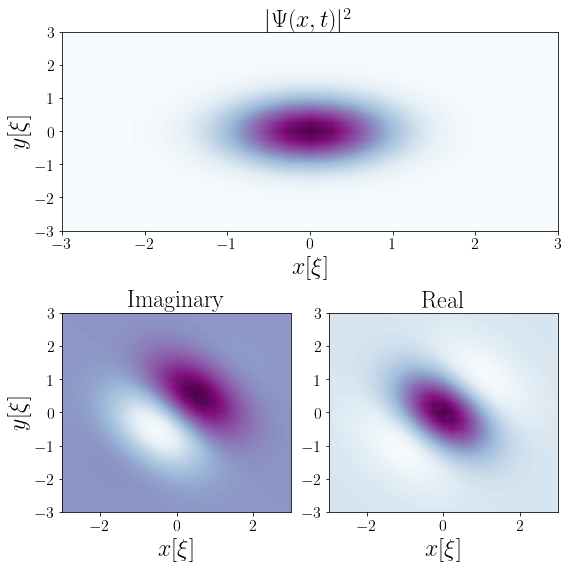

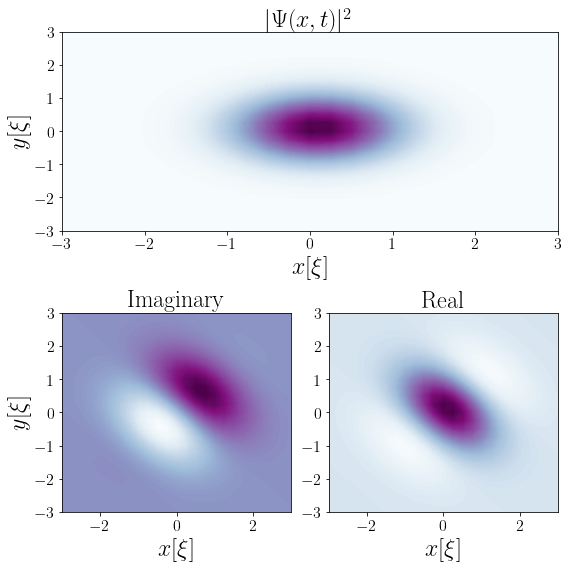

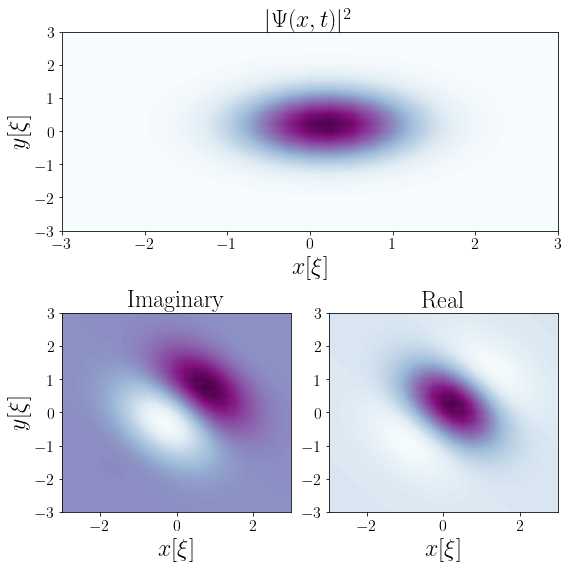

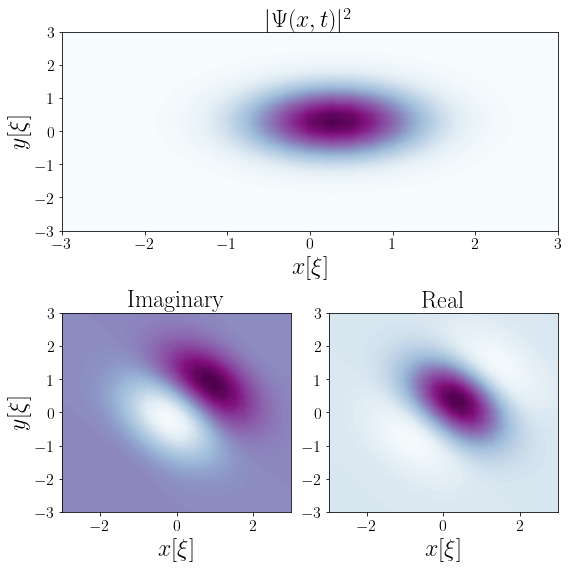

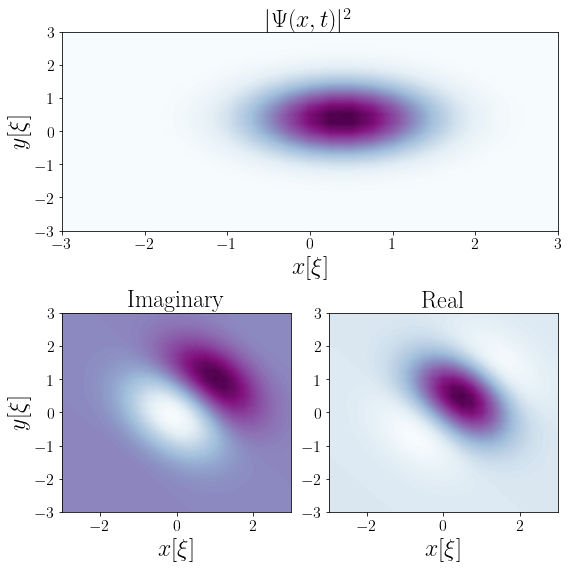

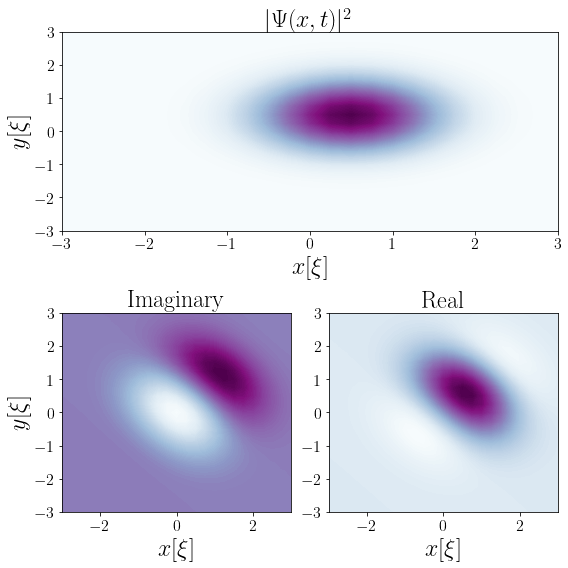

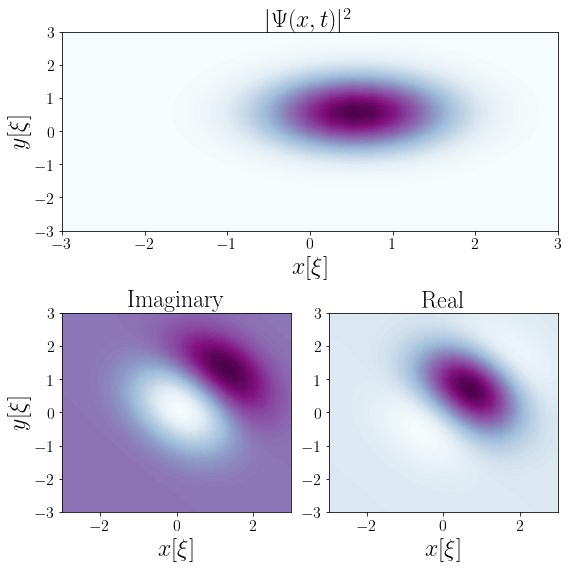

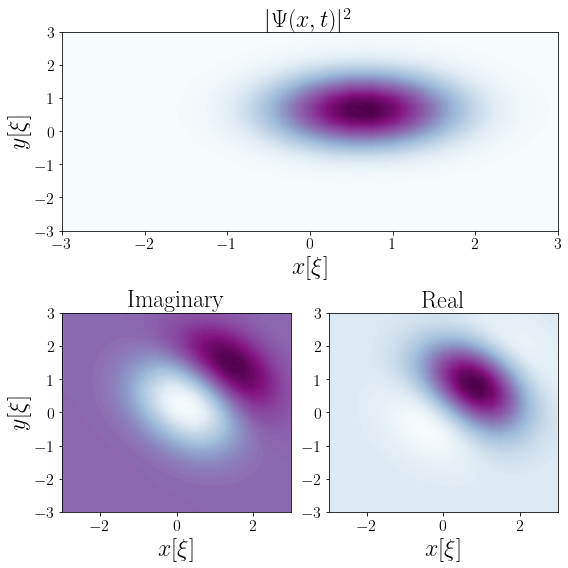

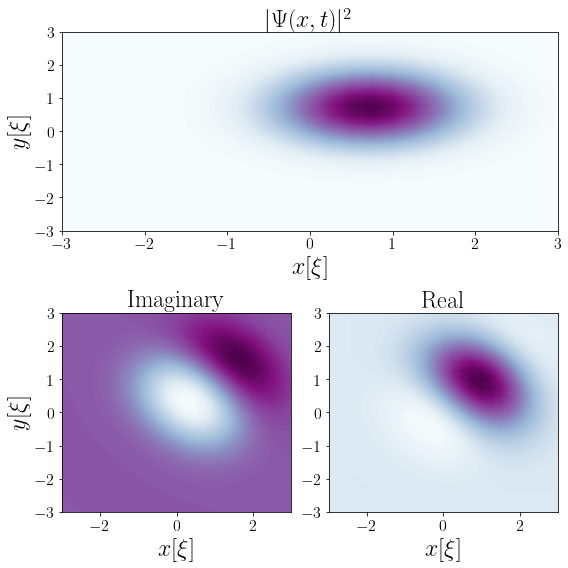

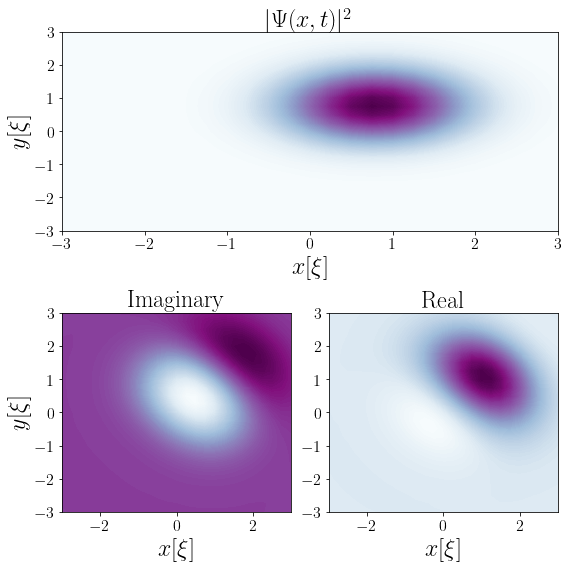

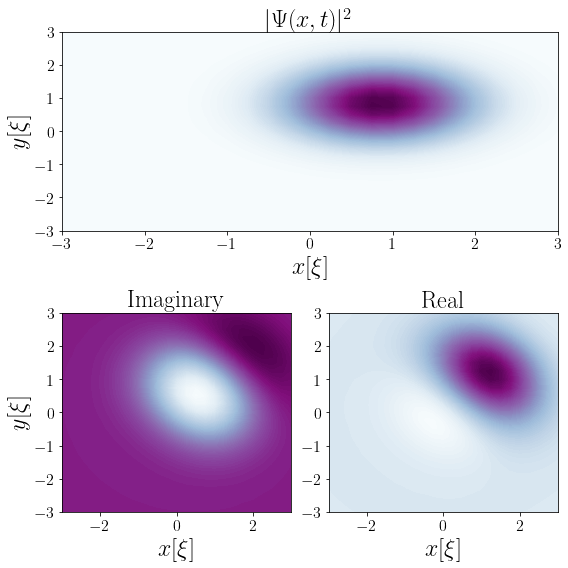

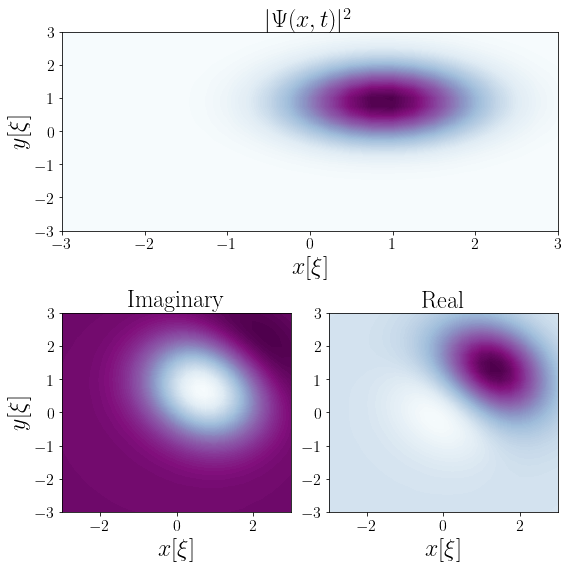

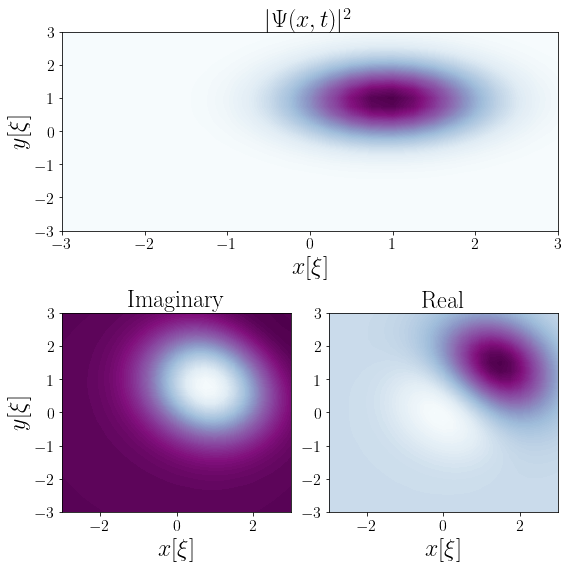

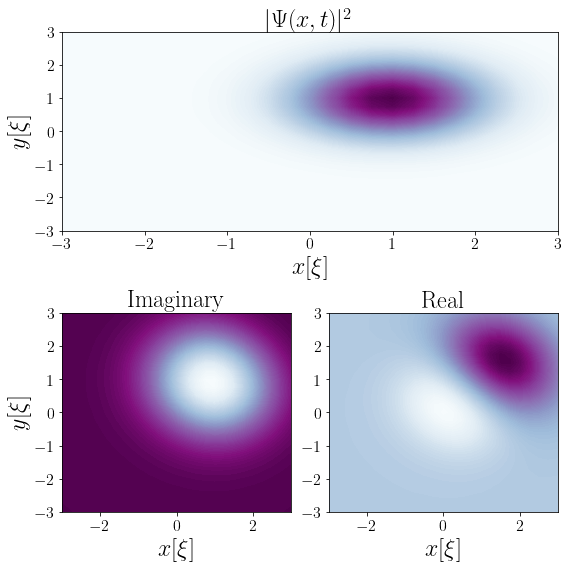

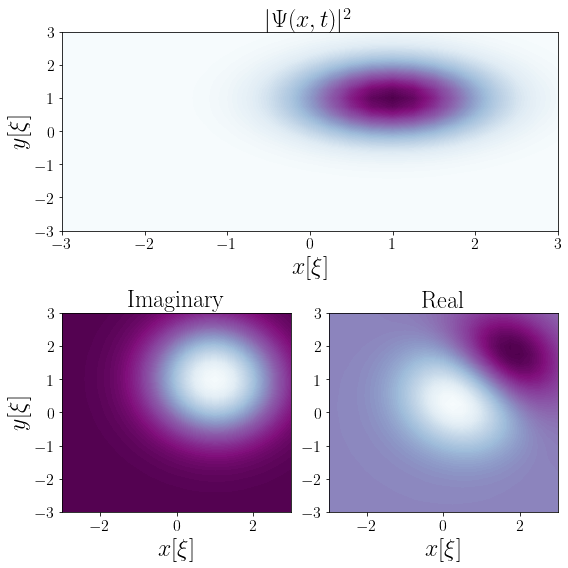

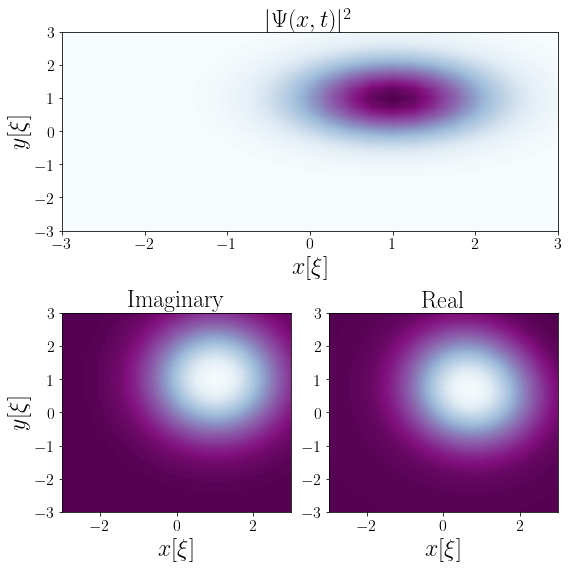

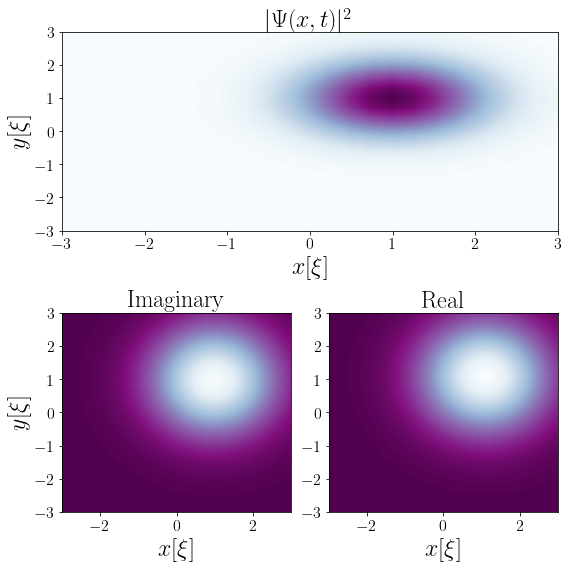

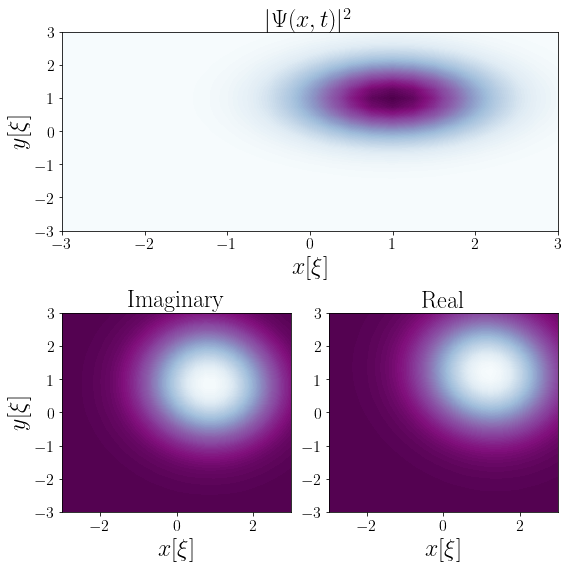

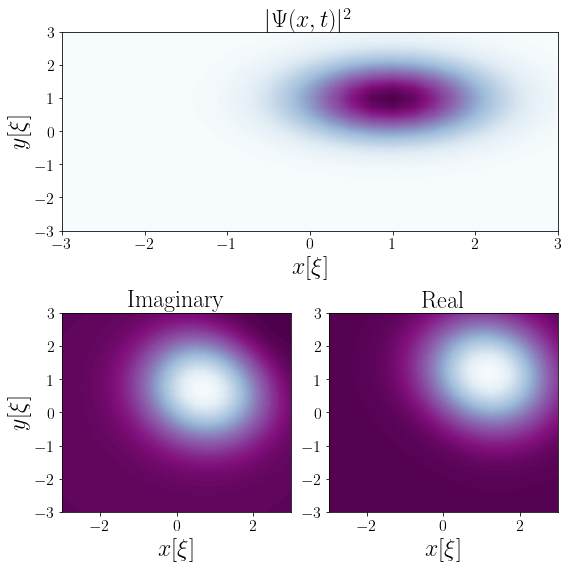

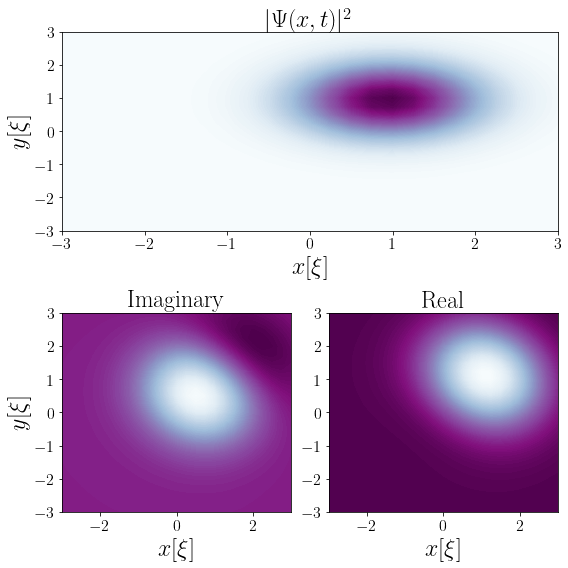

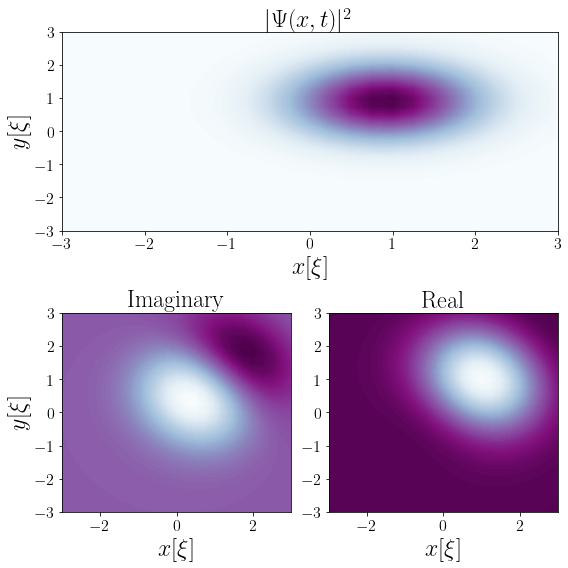

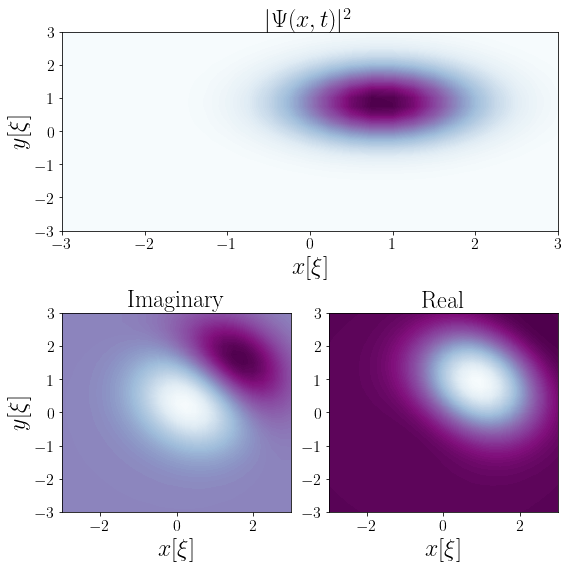

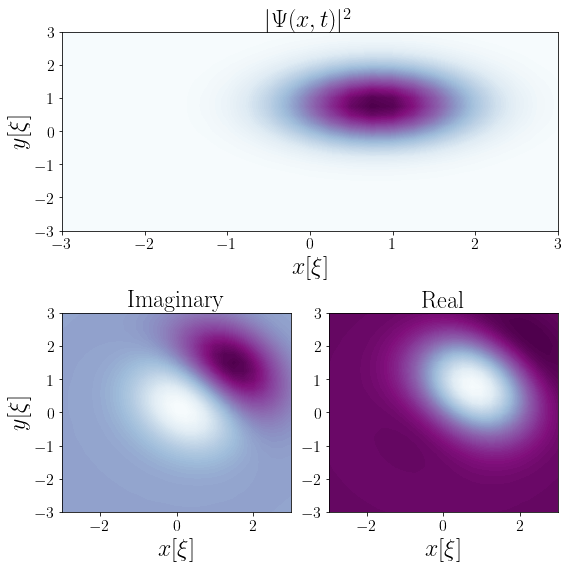

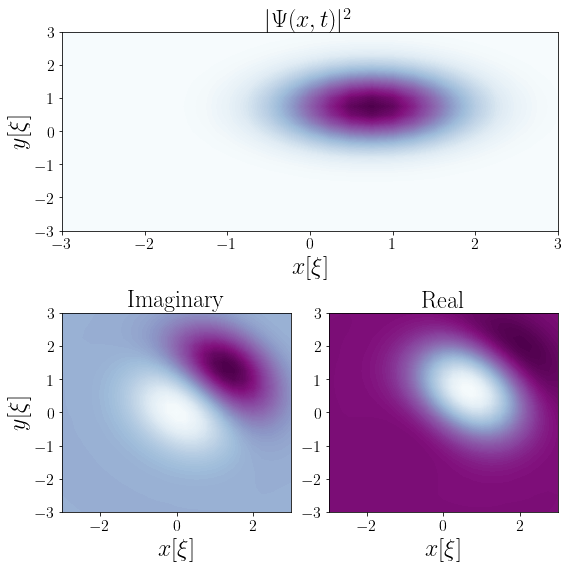

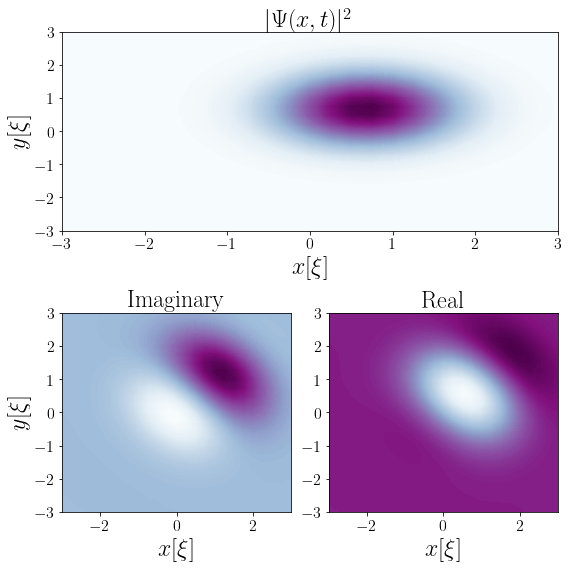

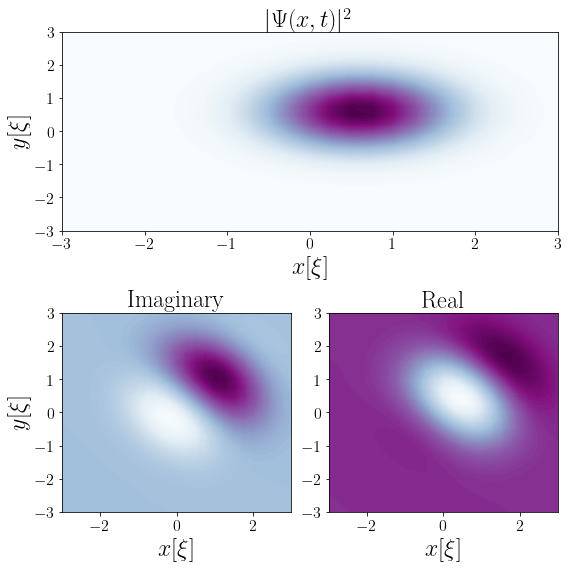

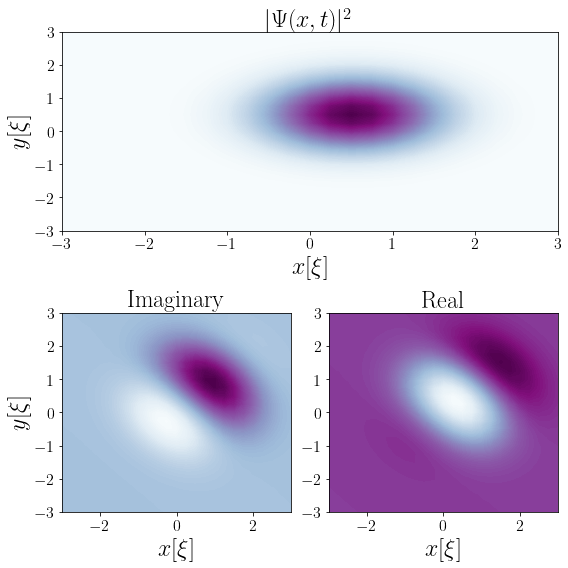

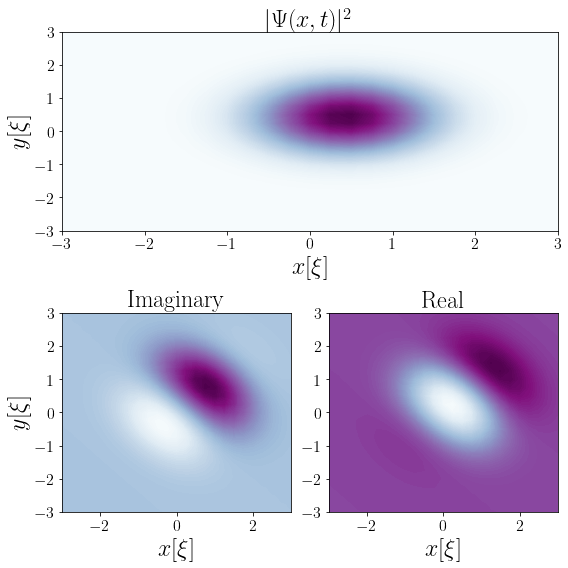

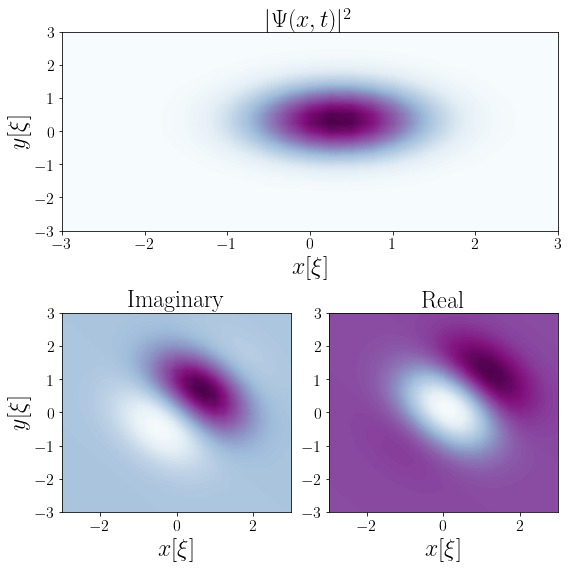

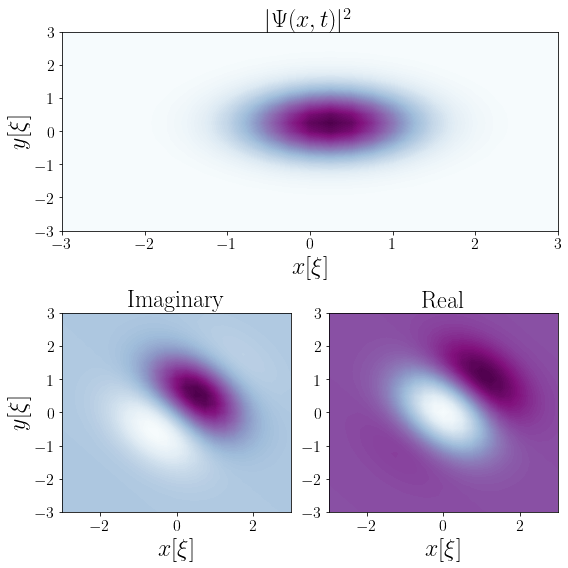

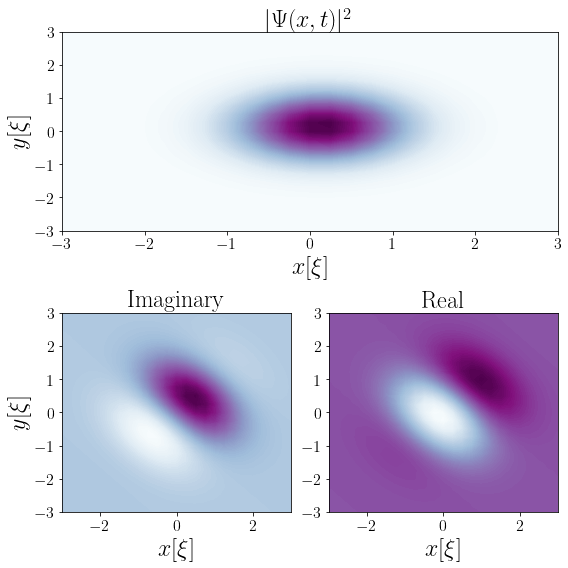

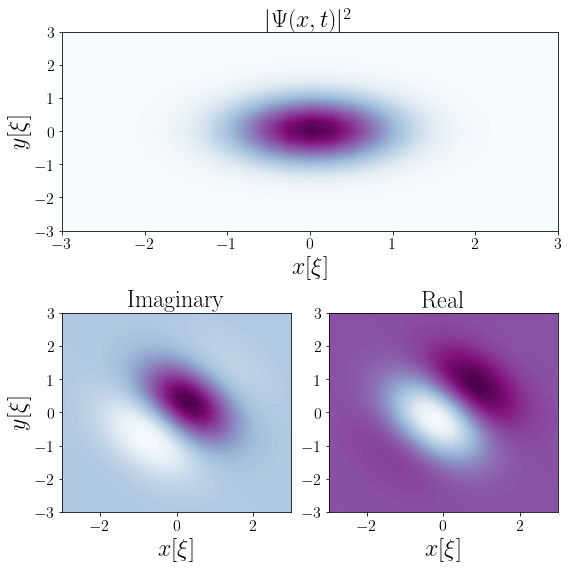

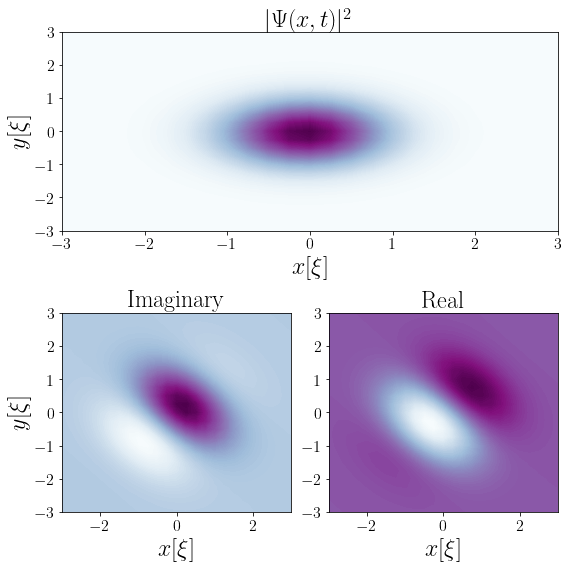

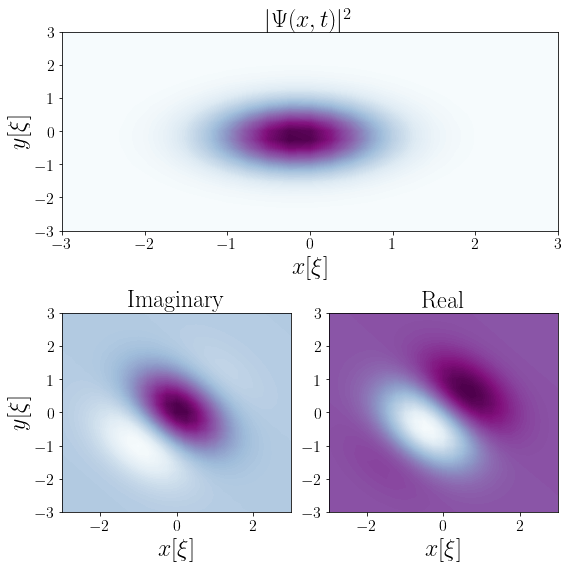

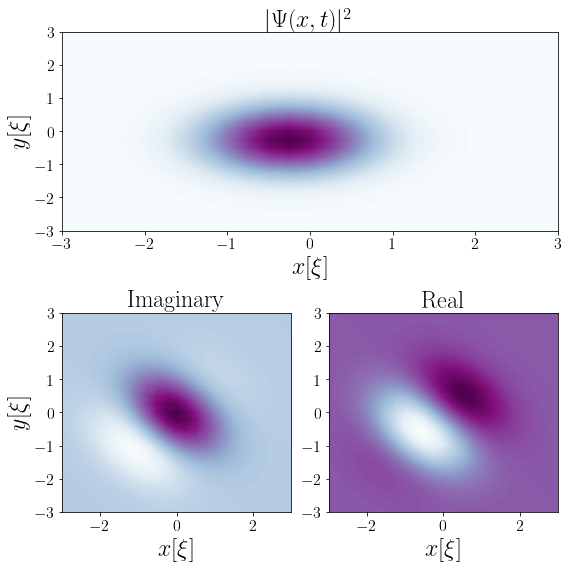

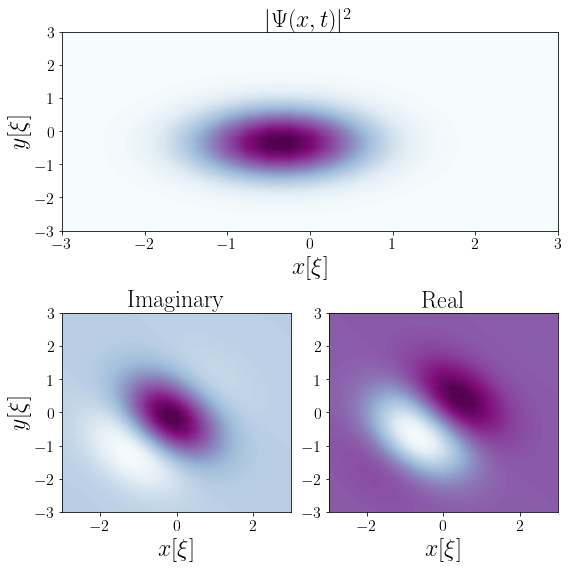

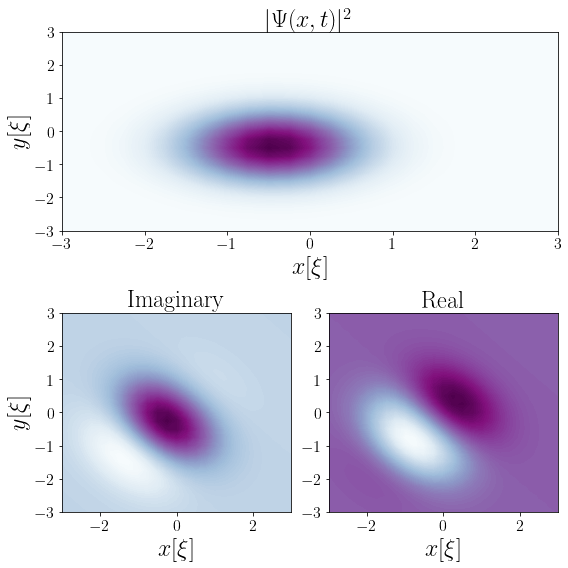

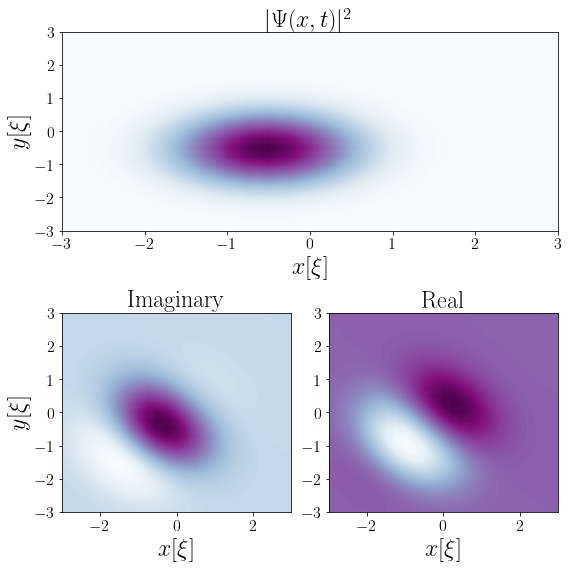

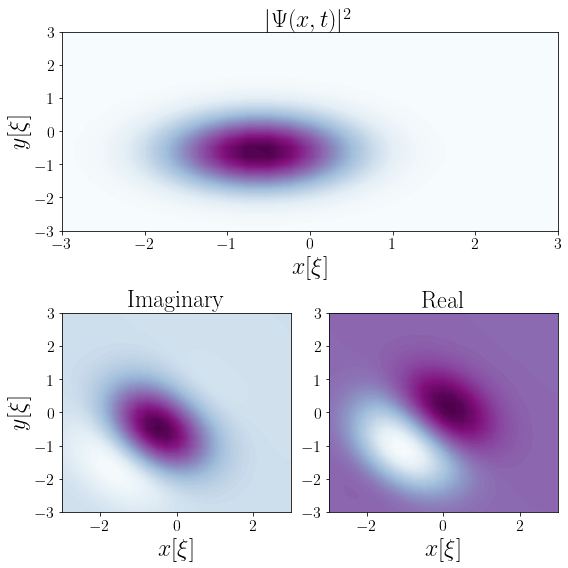

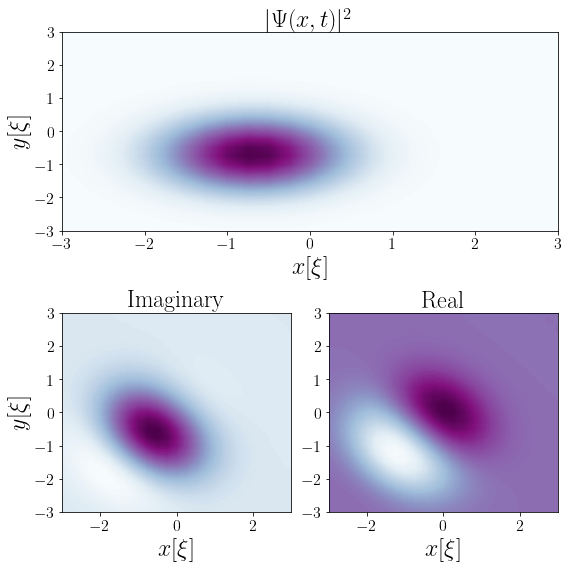

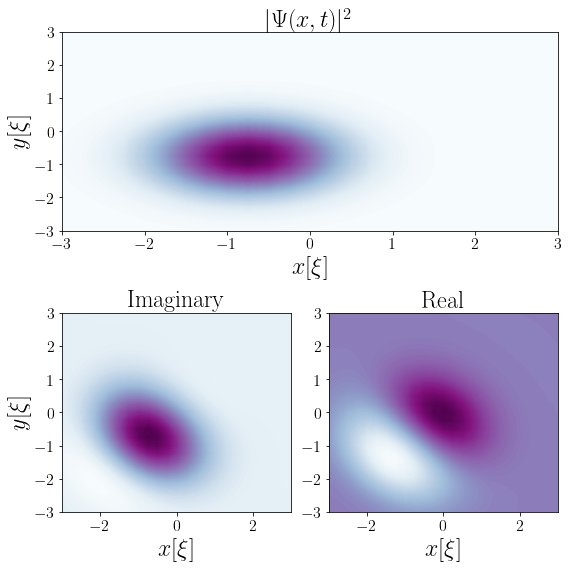

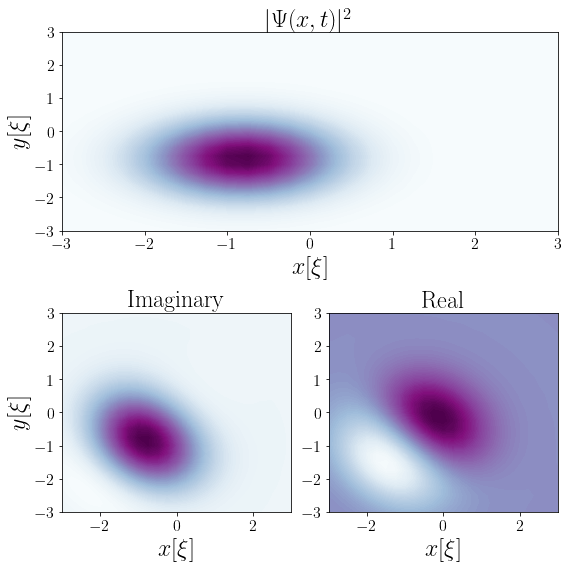

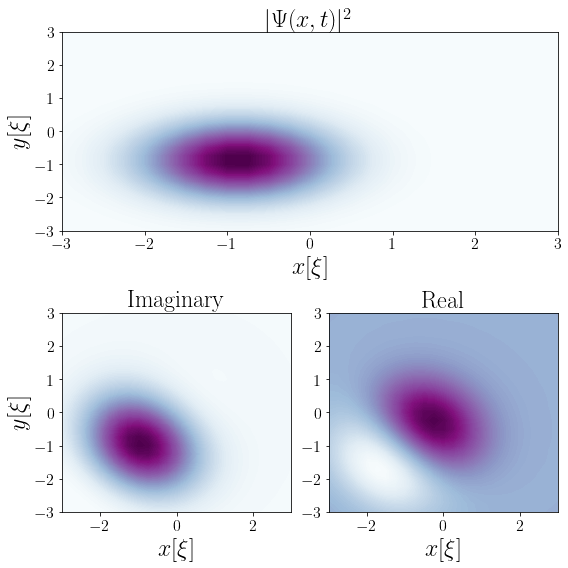

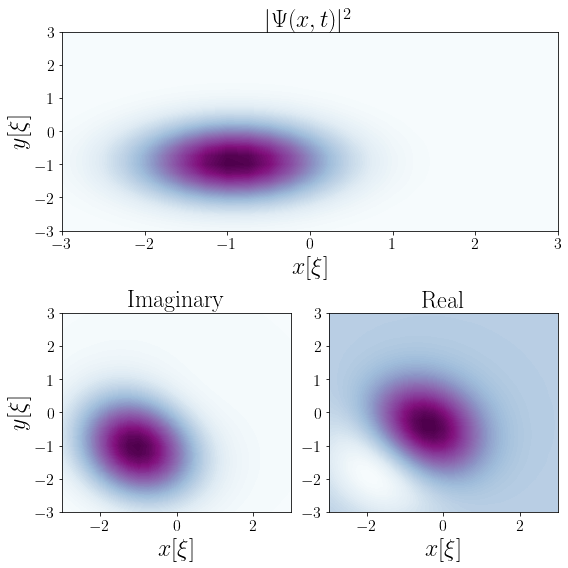

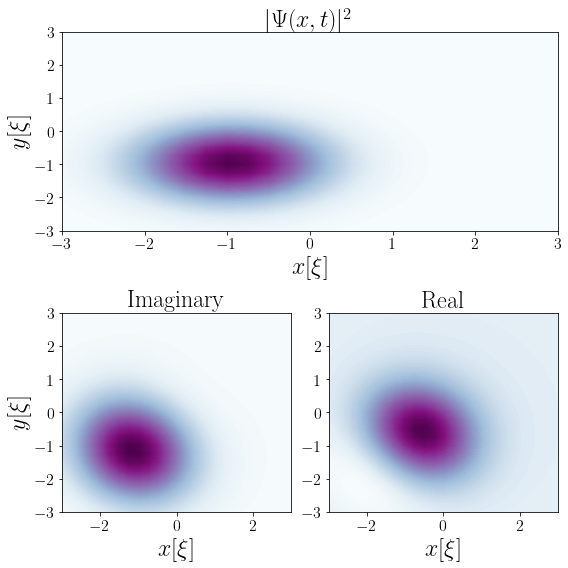

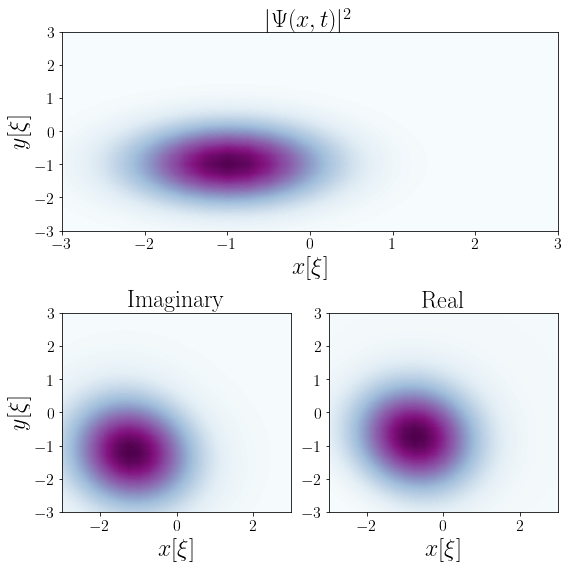

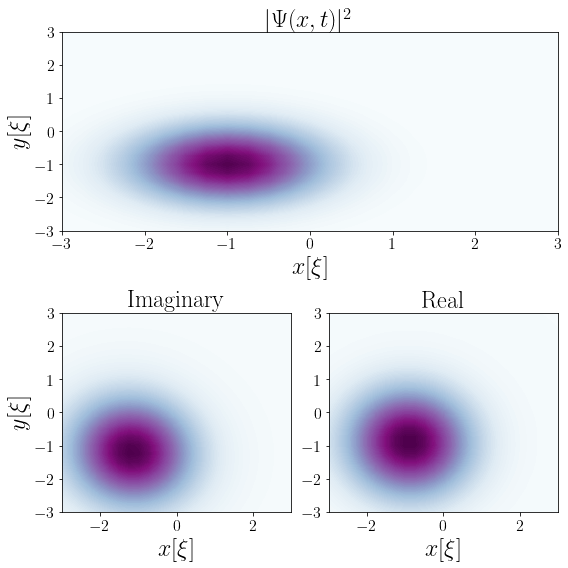

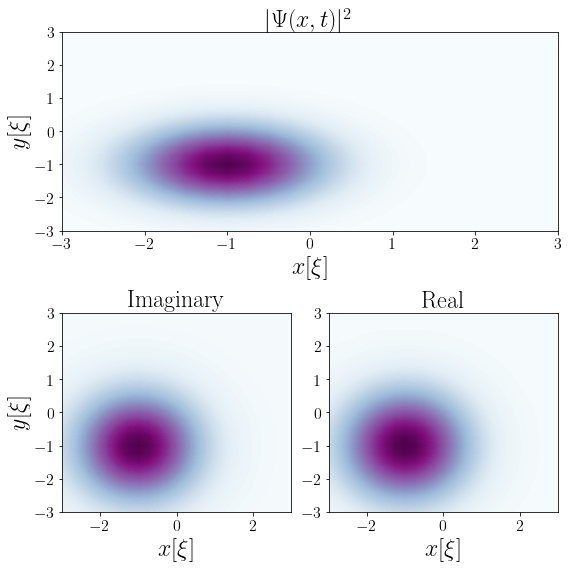

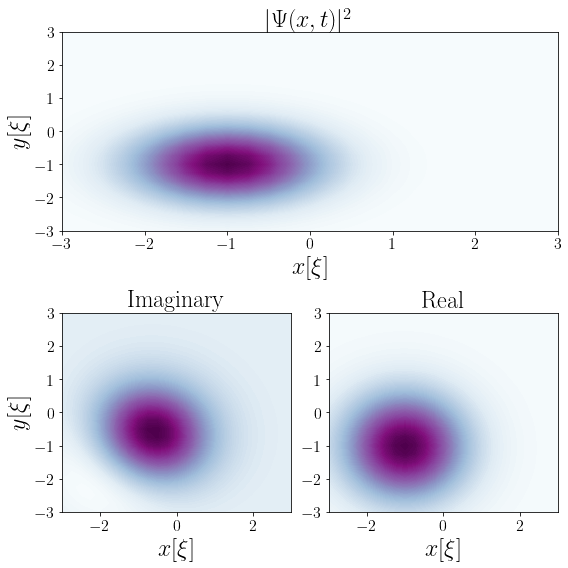

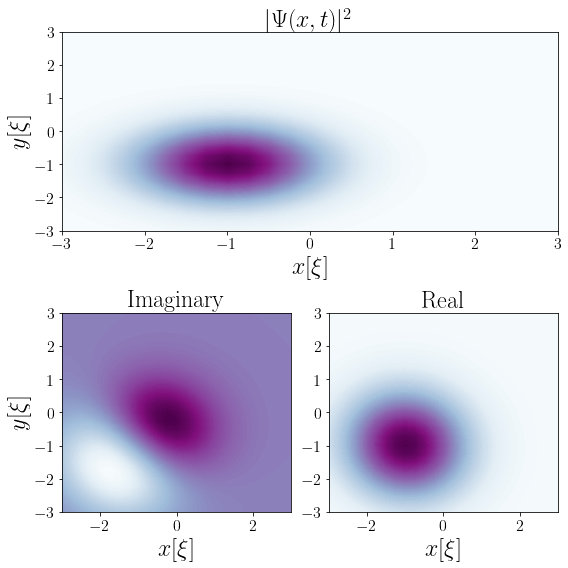

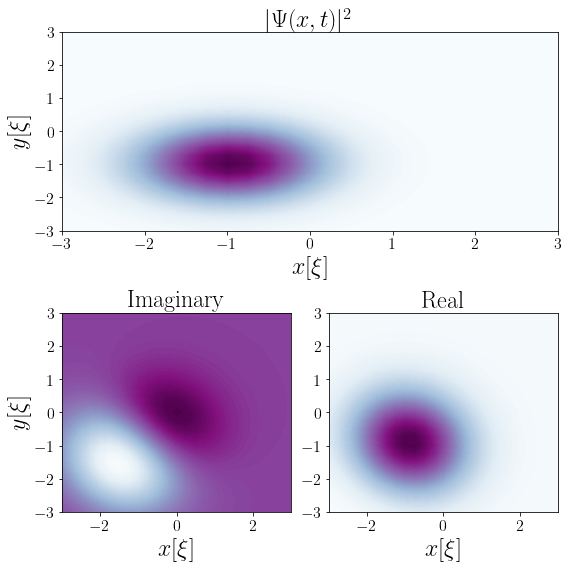

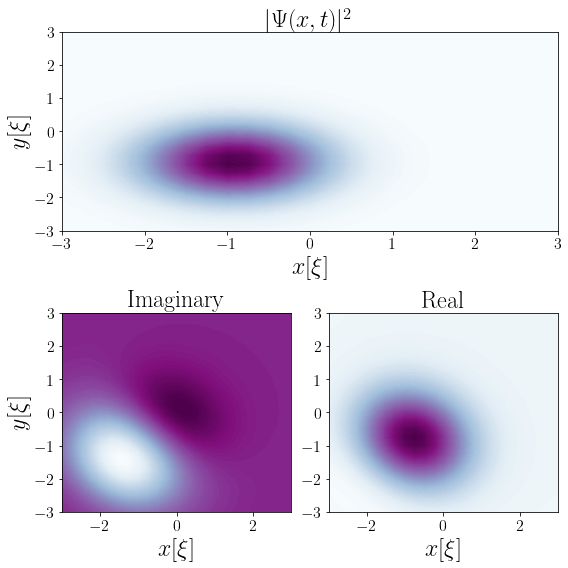

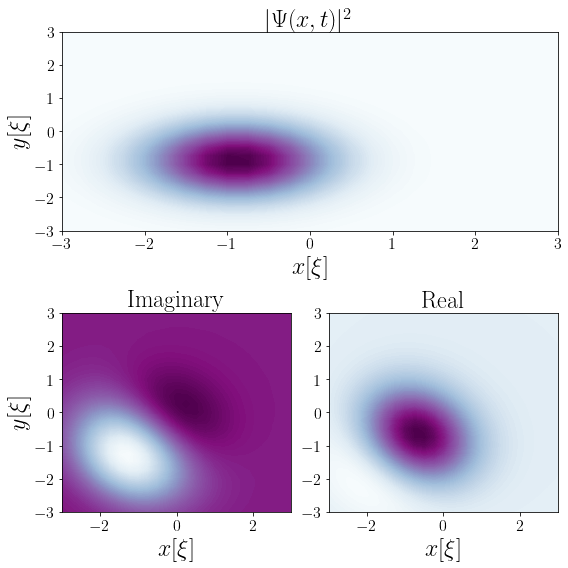

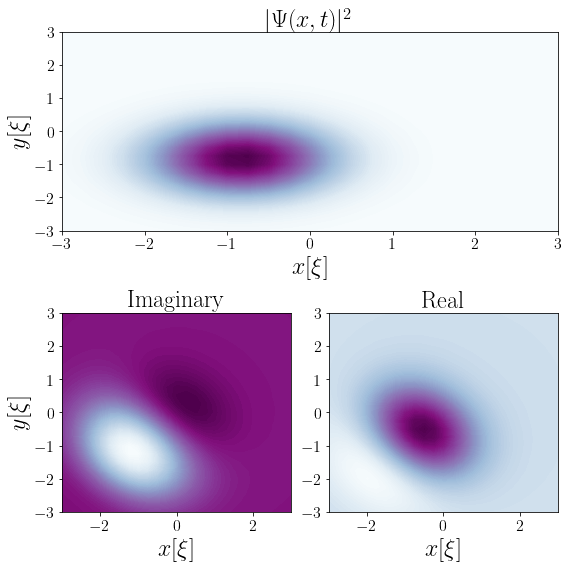

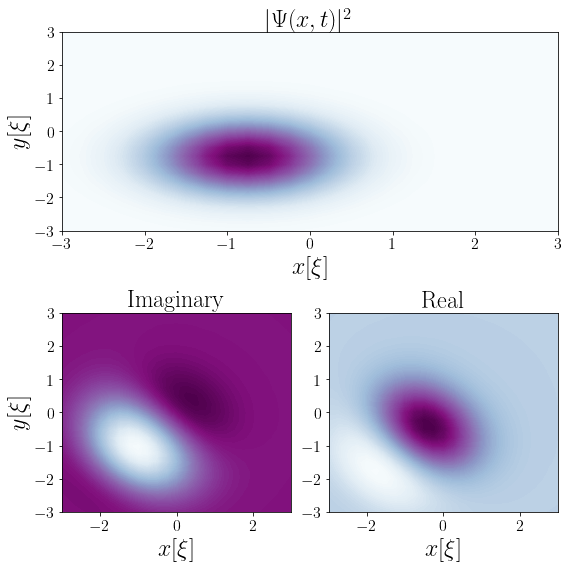

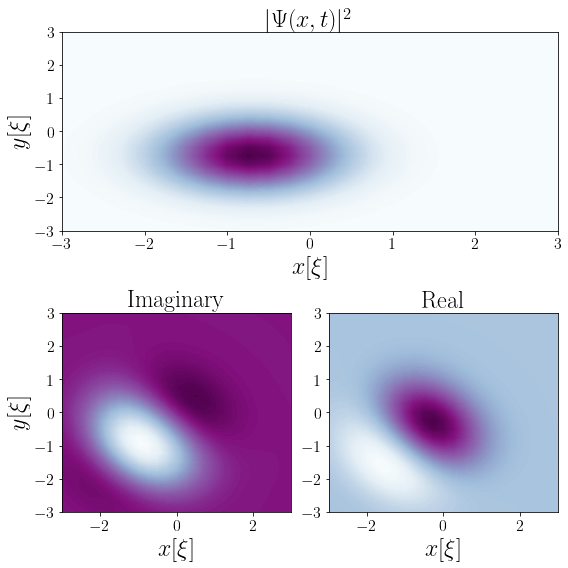

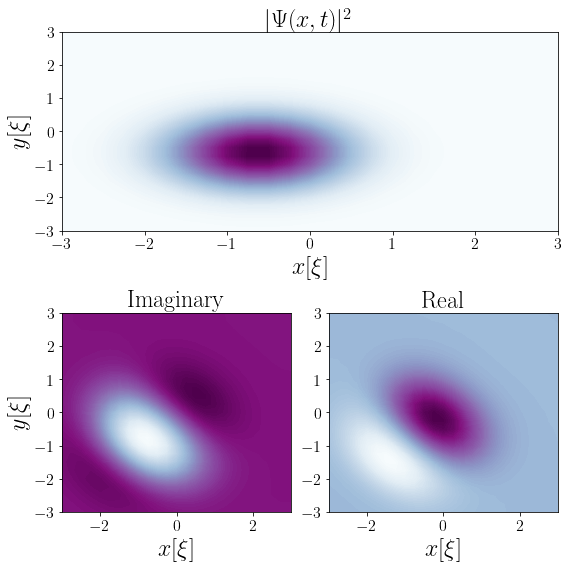

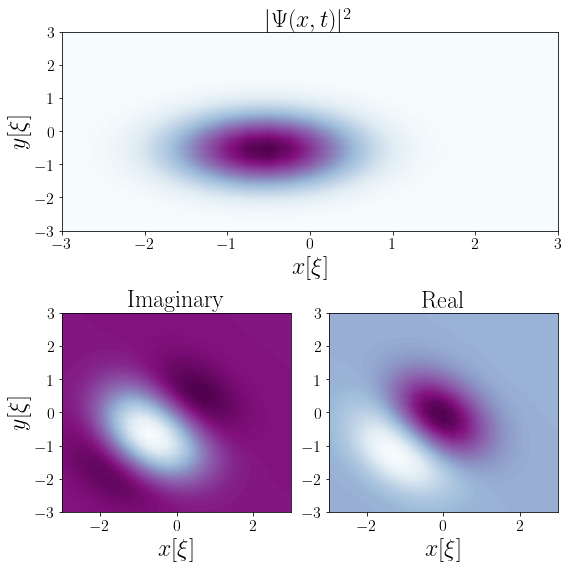

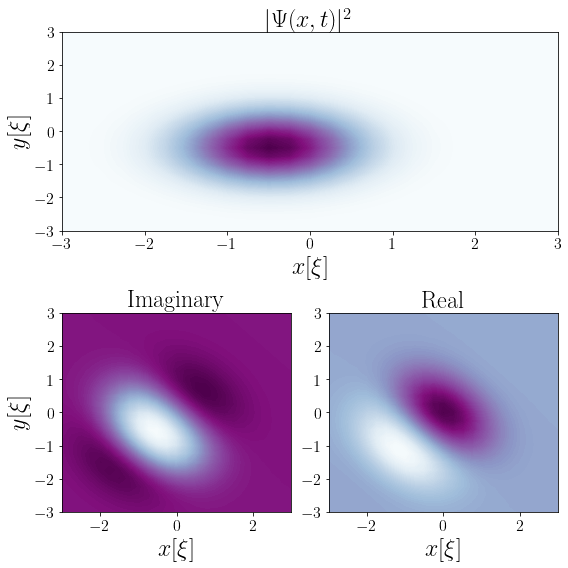

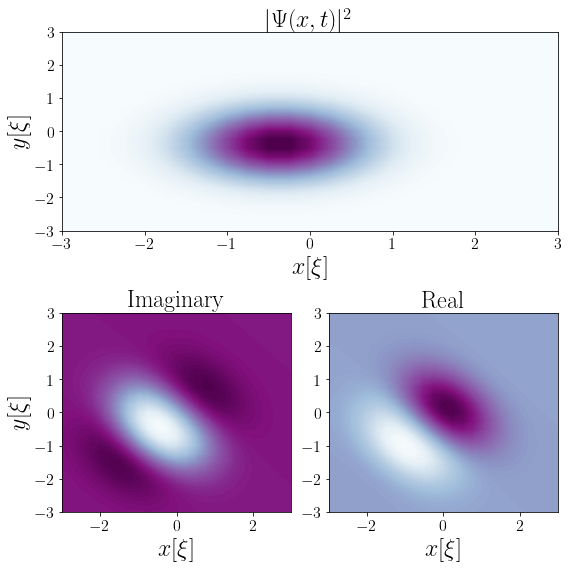

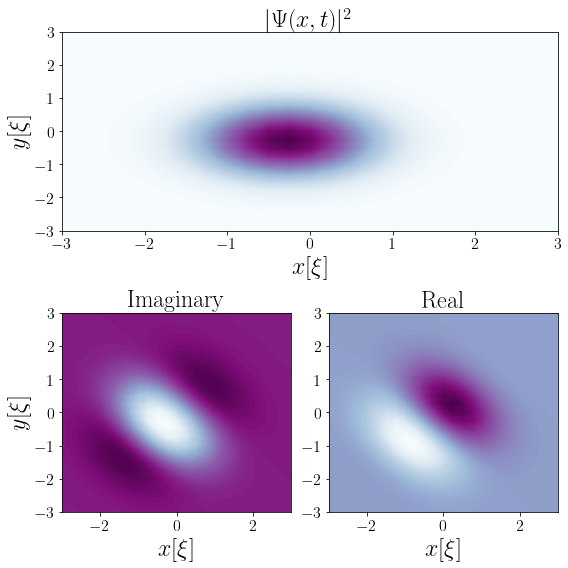

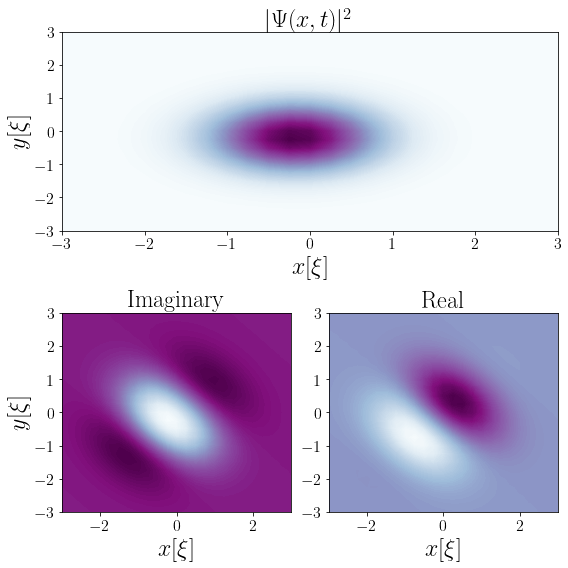

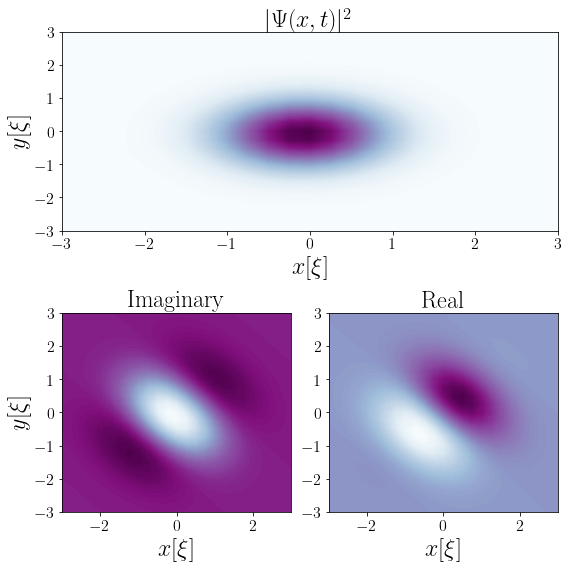

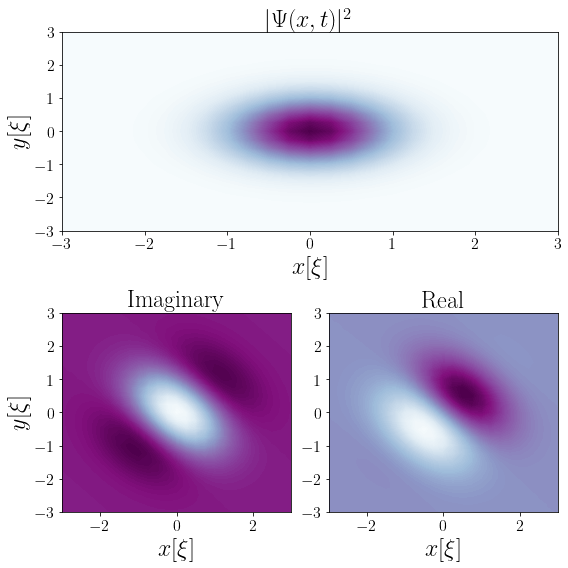

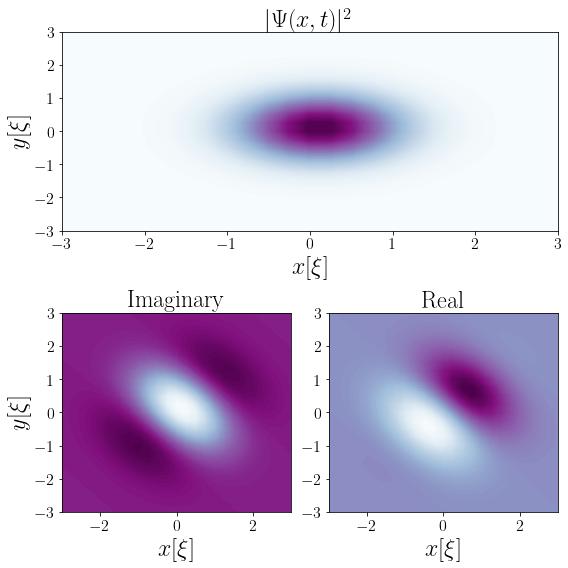

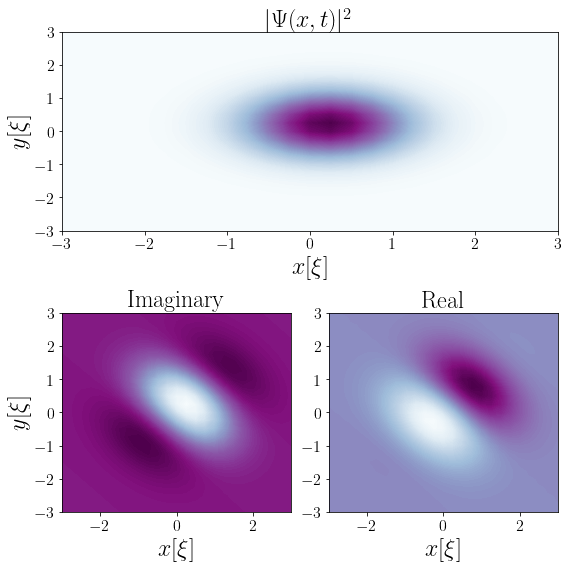

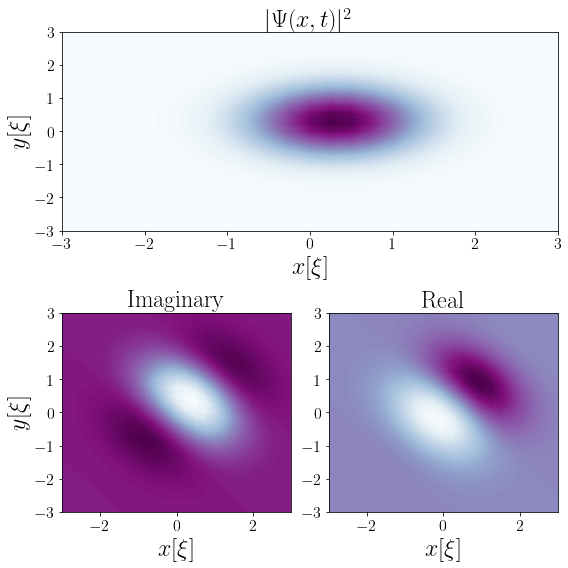

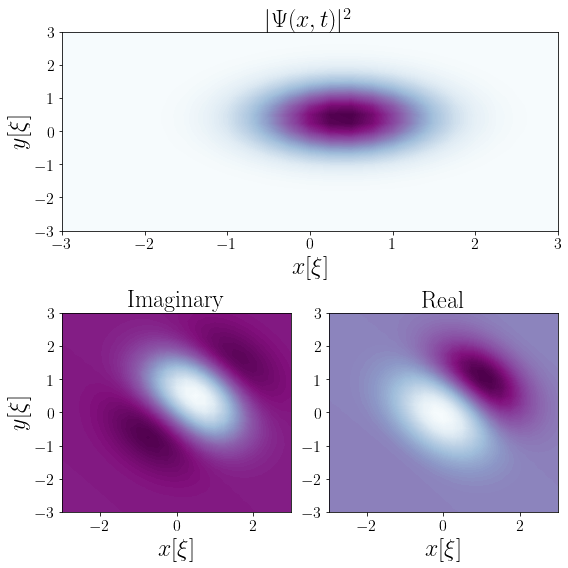

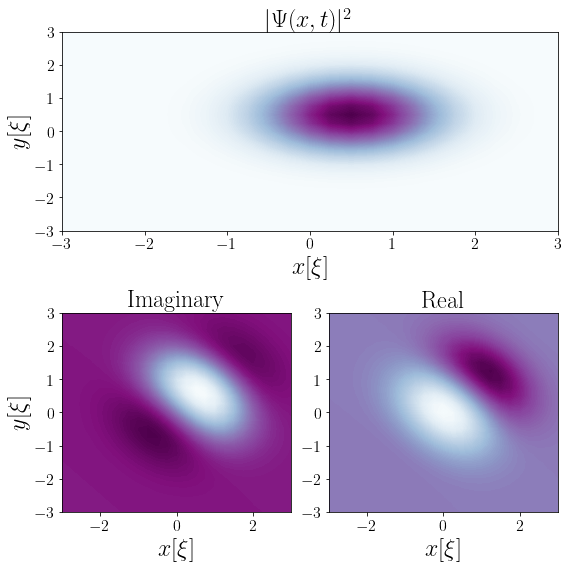

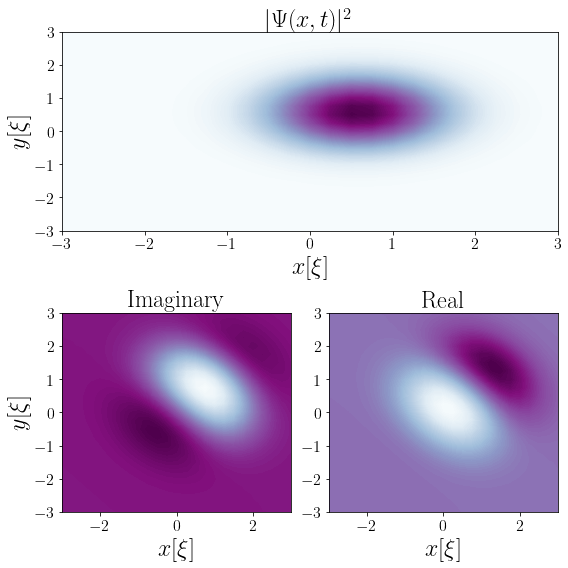

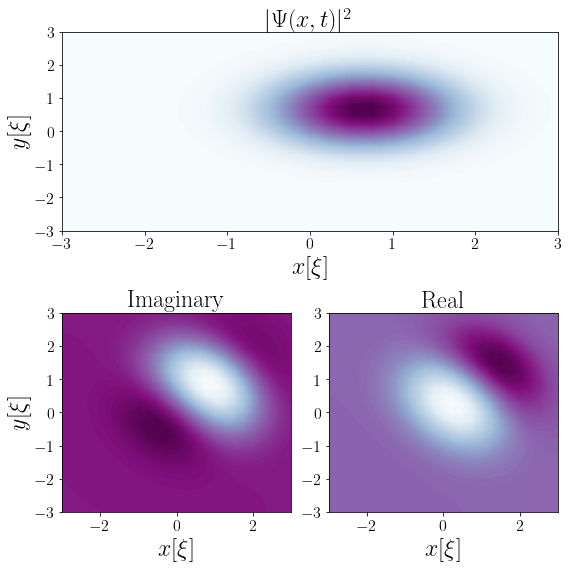

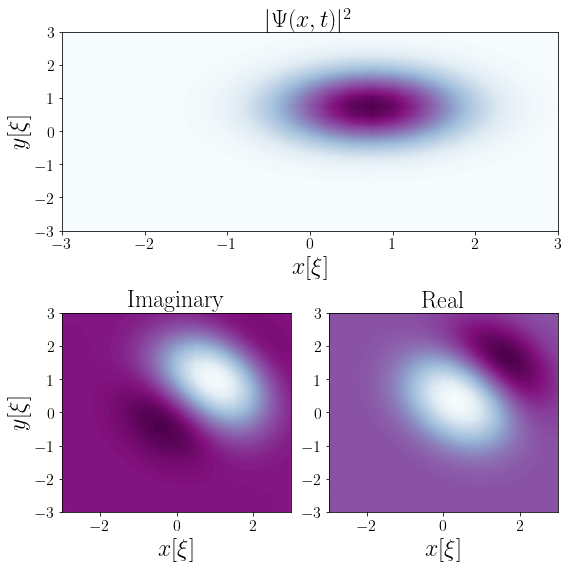

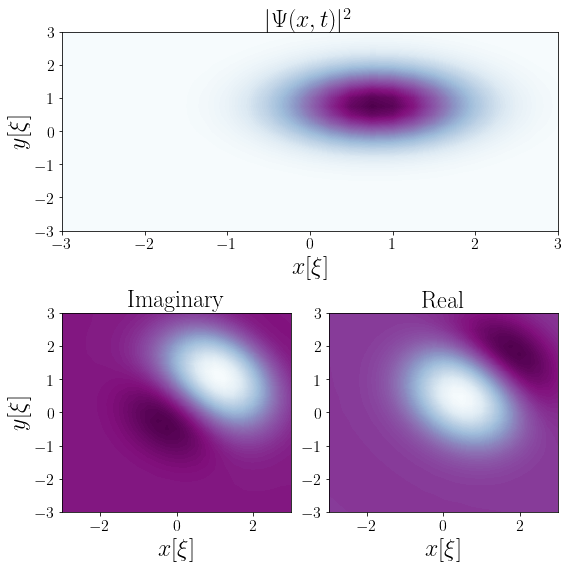

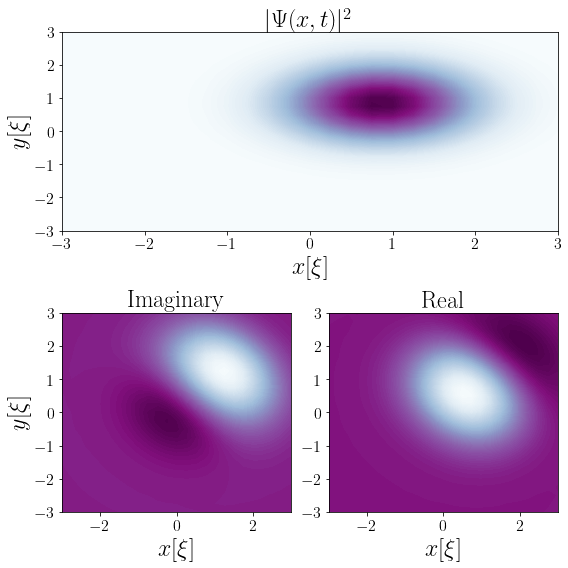

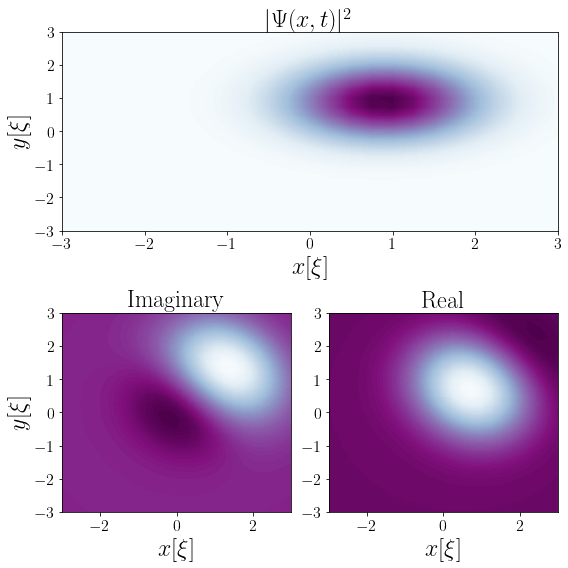

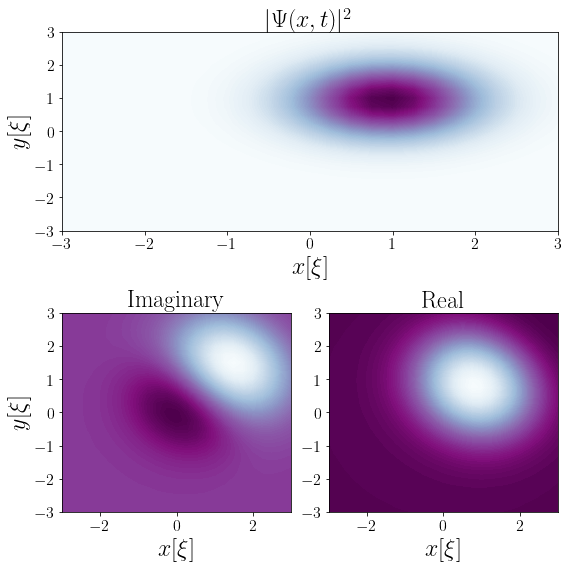

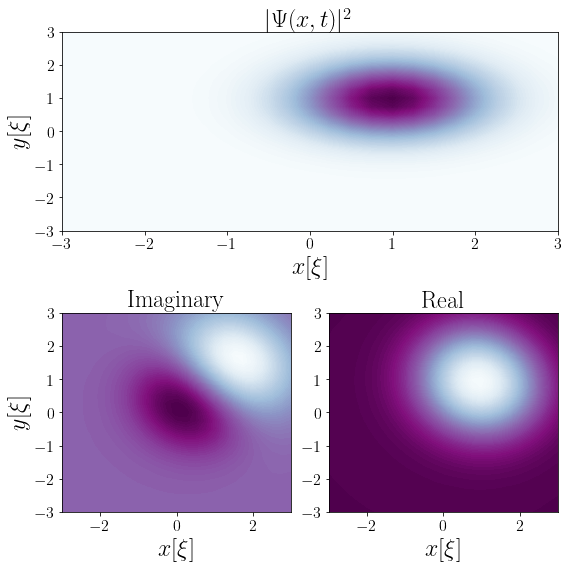

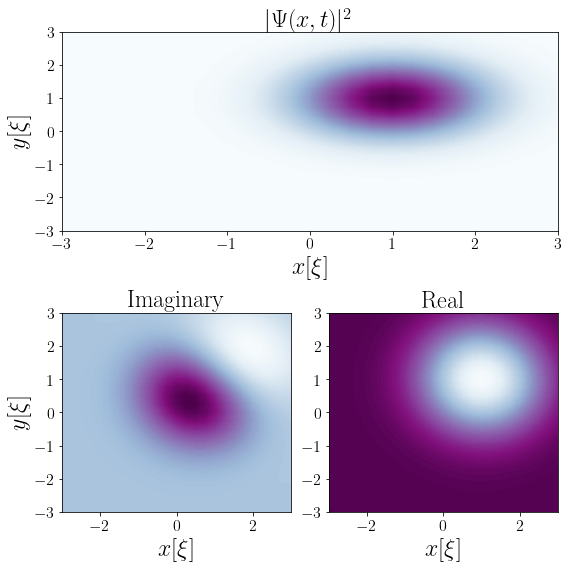

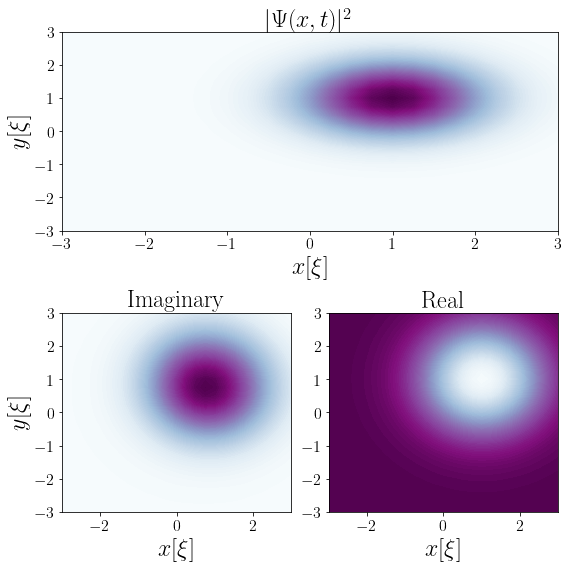

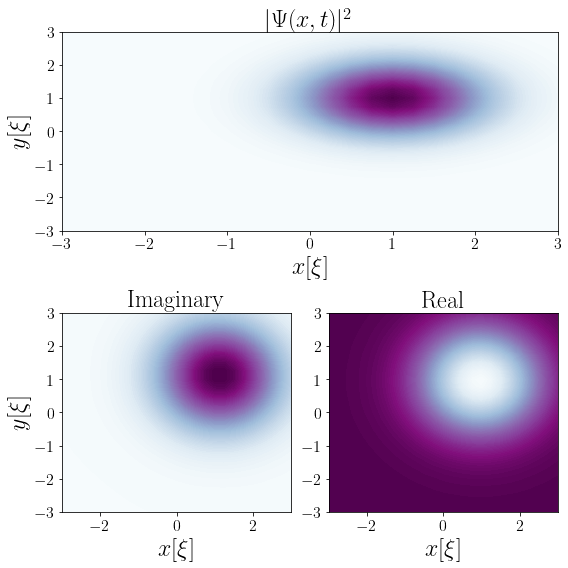

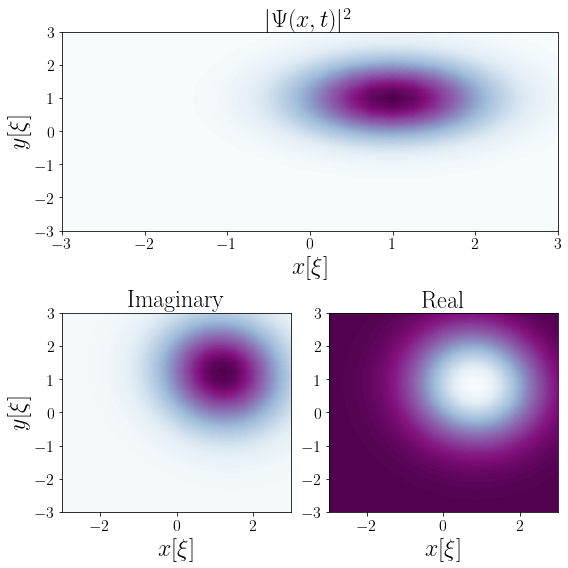

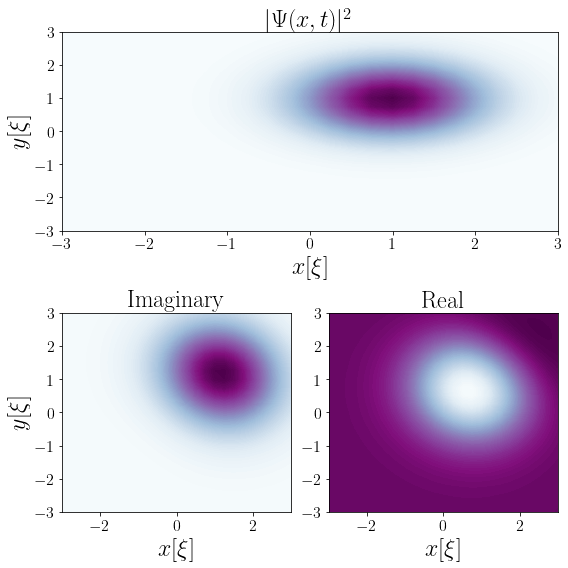

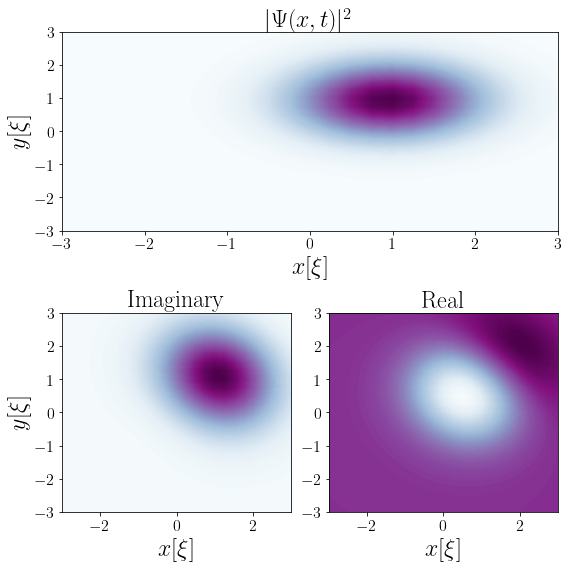

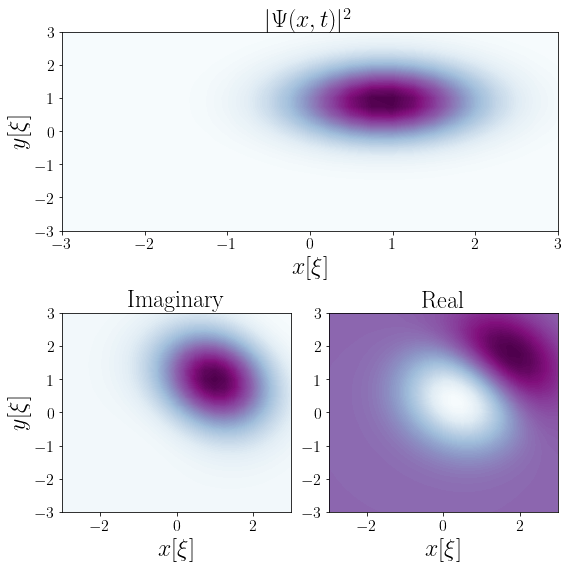

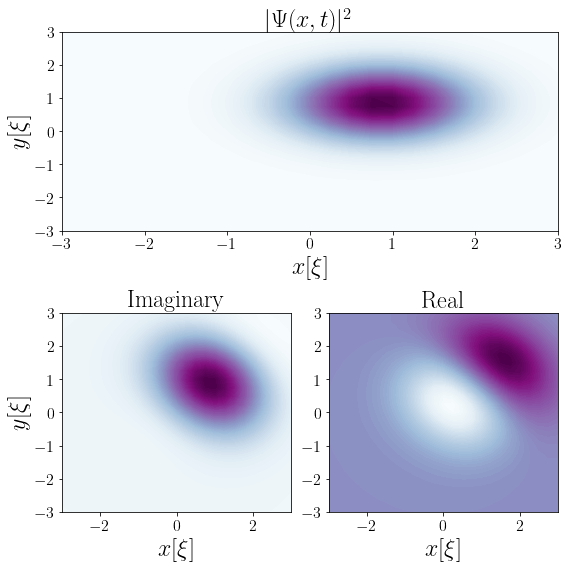

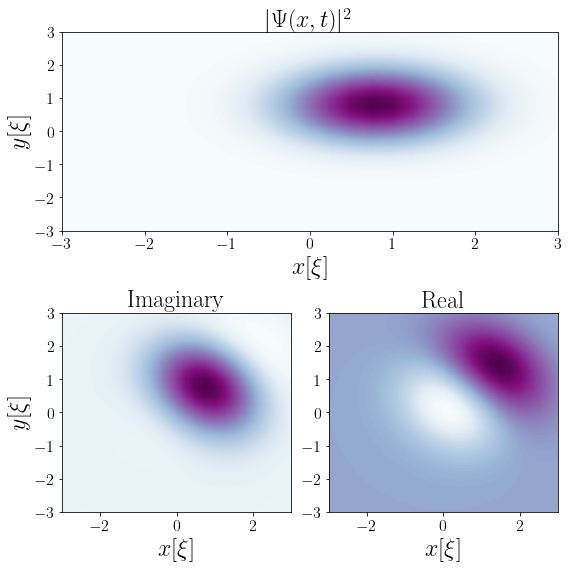

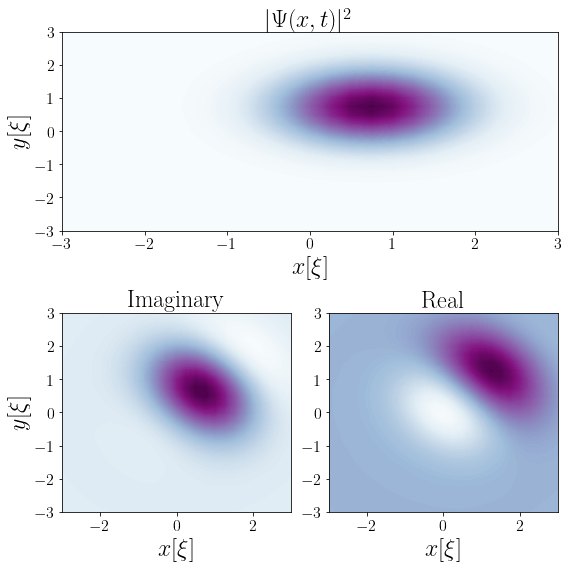

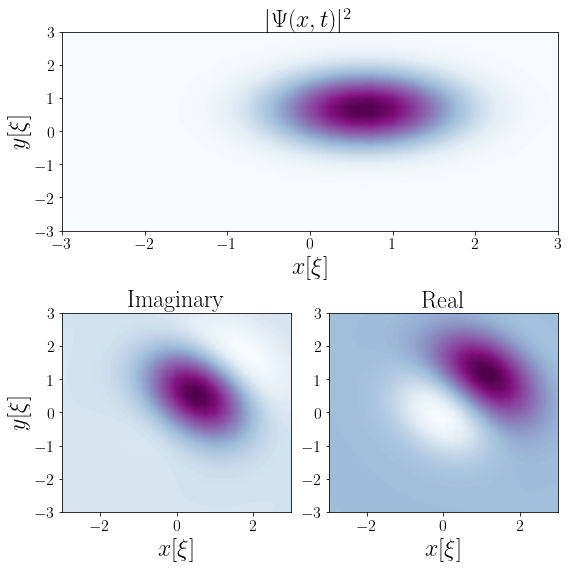

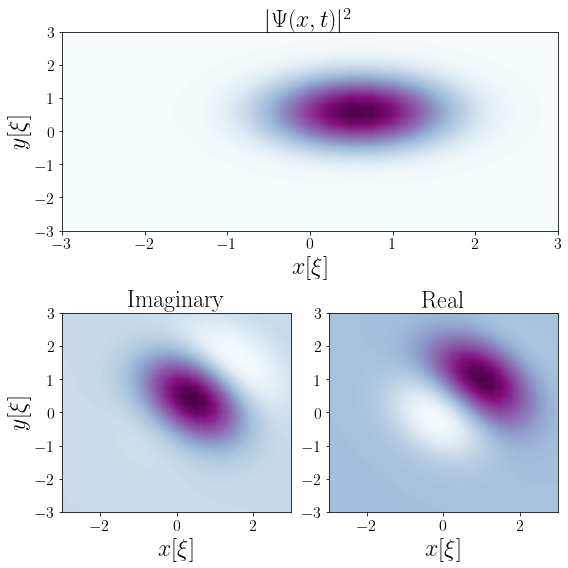

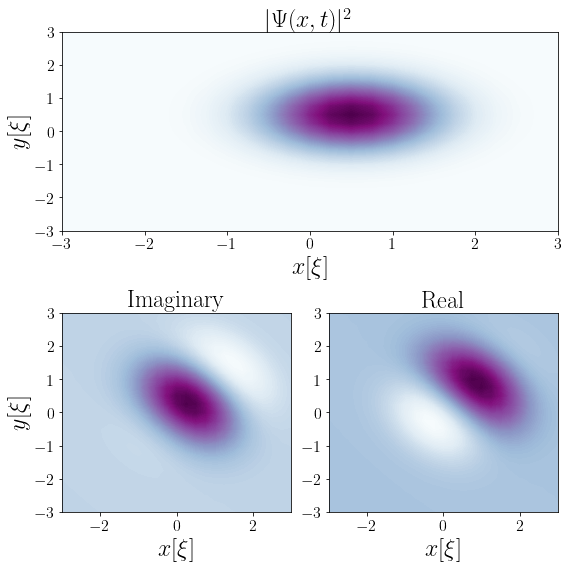

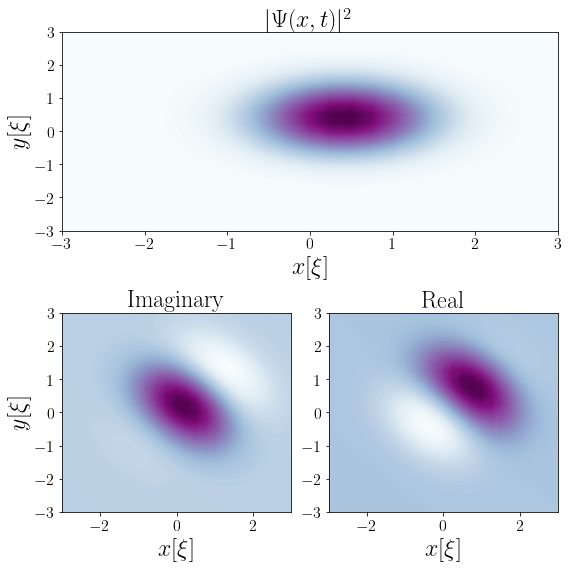

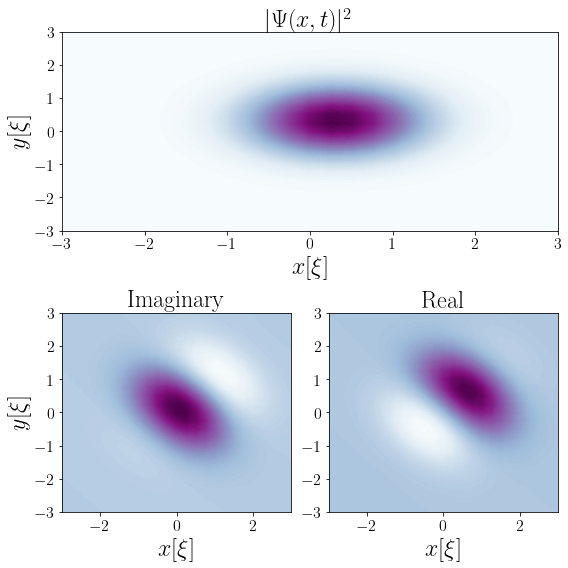

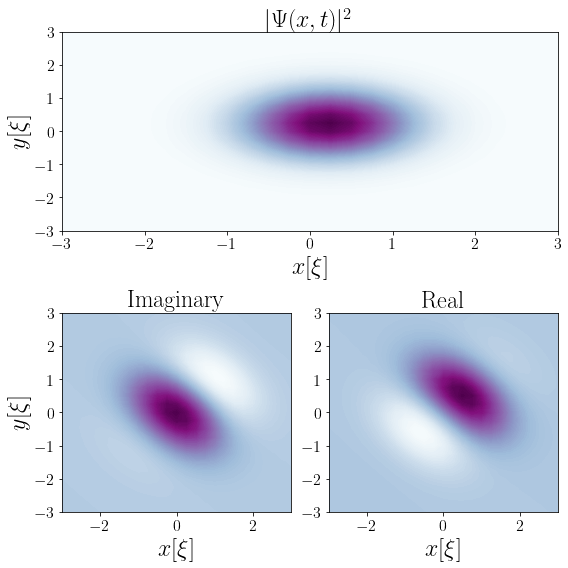

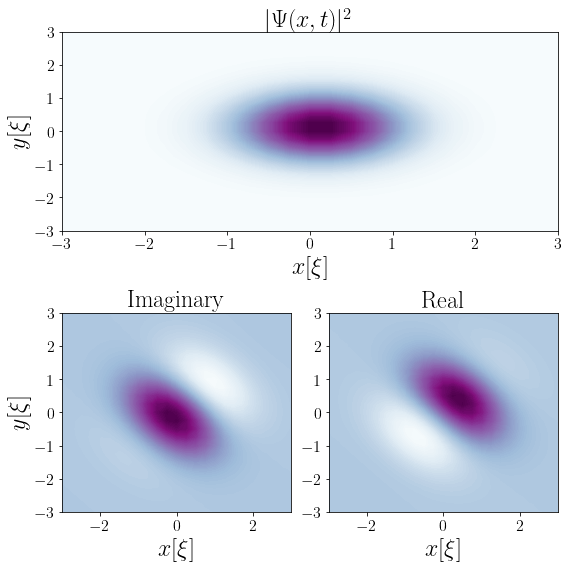

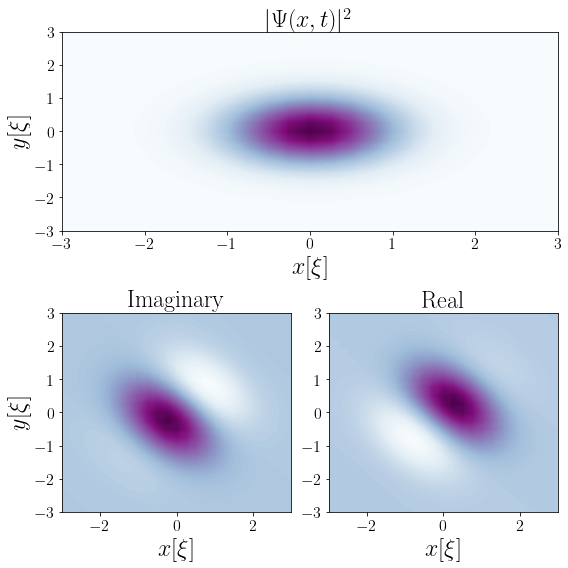

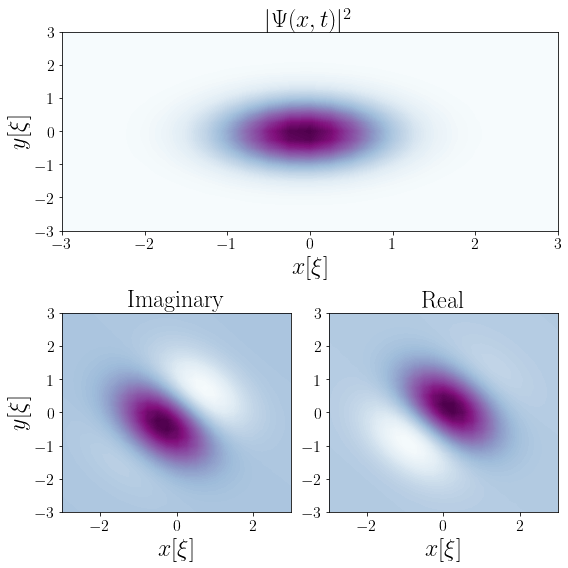

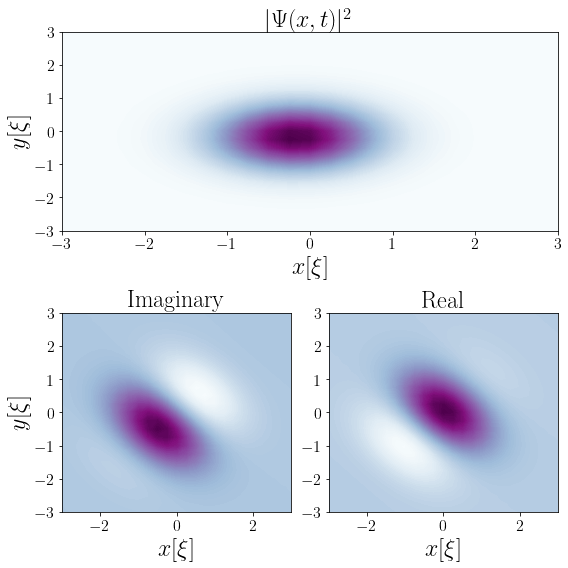

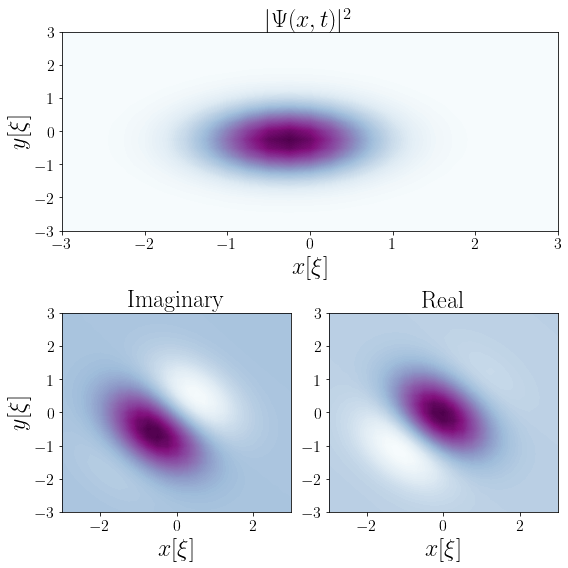

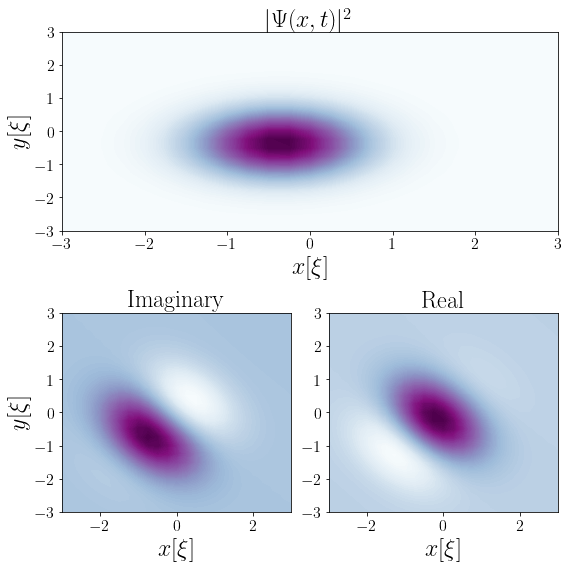

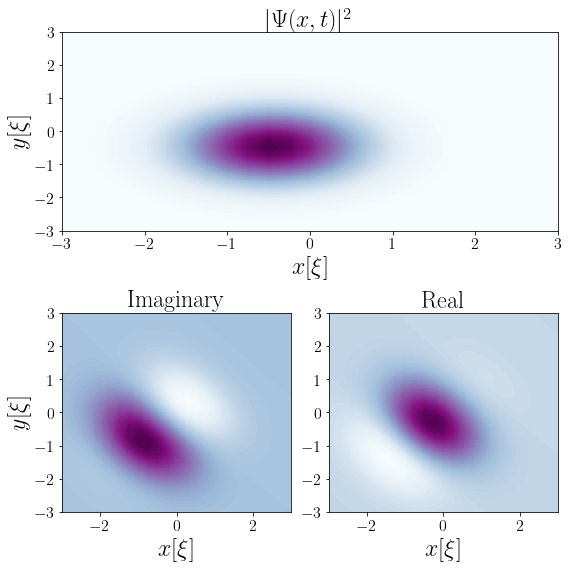

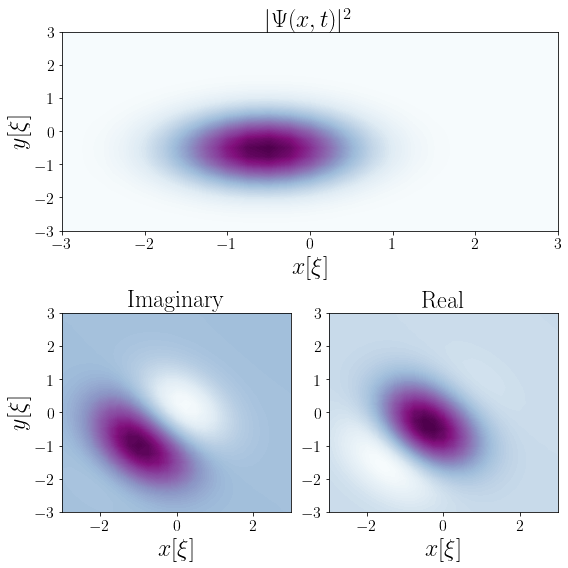

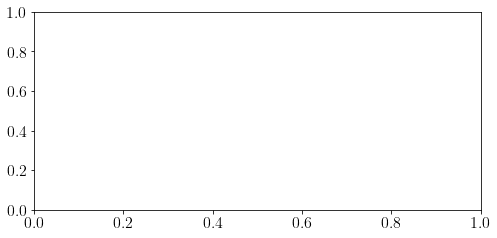

In [148]:
for i in range(len(GPE.prob_densities)):
    fig = plt.figure(figsize=(8,8))

    ax1 = plt.subplot(211)
    try:
        cd = ax1.contourf(X, Y, GPE.prob_densities[i*10,:,:], levels=100, cmap='BuPu')
    except:
        break
    ax1.set_ylim(-3, 3)
    ax1.set_xlim(-3, 3)
    ax1.set_xlabel(r'$x[\xi]$')
    ax1.set_ylabel(r'$y[\xi]$')
    ax1.set_title(r'$|\Psi(x, t)|^2$')

    ax2 = plt.subplot(223)
    cd = ax2.contourf(X, Y, np.imag(GPE.psi_x[i*10,:,:]), levels=100, cmap='BuPu')
    ax2.set_ylim(-3, 3)
    ax2.set_xlim(-3, 3)
    ax2.set_xlabel(r'$x[\xi]$')
    ax2.set_ylabel(r'$y[\xi]$')
    ax2.set_title(r'Imaginary')

    ax3 = plt.subplot(224)
    cd = ax3.contourf(X, Y, np.real(GPE.psi_x[i*10,:,:]), levels=100, cmap='BuPu')
    ax3.set_ylim(-3, 3)
    ax3.set_xlim(-3, 3)
    ax3.set_xlabel(r'$x[\xi]$')
    ax3.set_title(r'Real')
    plt.tight_layout()
    plt.savefig(figure_path+f'/GPE_gaussian2D_Complete{i}.png', dpi=300, bbox_inches='tight')

In [149]:
from PIL import Image
imgs = [Image.open(figure_path+f'/GPE_gaussian2D_Complete{i}.png') for i in range(100)]
imgs[0].save(figure_path+"/GPE_HO2D_Completed.gif", save_all=True, append_images=imgs[1:], duration=50, loop=0)